**ReneWind**

Năng lượng tái tạo, đặc biệt là năng lượng gió, đang ngày càng trở nên quan trọng trong ngành sản xuất năng lượng toàn cầu. ReneWind là một công ty sử dụng học máy để cải thiện hiệu suất máy móc trong quá trình sản xuất năng lượng gió. Họ thu thập dữ liệu về hỏng hóc của các cánh quạt gió và muốn xây dựng mô hình phân loại để dự đoán sự cố trước khi xảy ra để giảm chi phí bảo dưỡng.

Dữ liệu gồm 40 biến dự đoán và 1 biến mục tiêu, được chia thành tập huấn luyện và tập kiểm tra. Mục tiêu là xác định các lỗi trong quá trình sản xuất để giảm thiểu chi phí bảo dưỡng tổng thể.

Ở project môn khai phá dữ liệu này tôi sẽ phân tích và xử lý dữ liệu. Sau đó tìm ra model tốt cho việc dự đoán phân lớp có các bươc như sau:

### Outline

- <a href = #link1>  1. Data Overview </a>
- <a href = #link2>  2. Exploratory Data Analysis (EDA) </a>
- <a href = #link3>  3. Data Preprocessing </a>
- <a href = #link4>  4. Model Evaluation Criterion  </a>
- <a href = #link5>  5. Model Building with Original Data  </a>
- <a href = #link6>  6. Model Building with OverSampled Data </a>
- <a href = #link7>  7. Model Building with Undersampled data </a>
- <a href = #link8>  8. Model Selection for Tuning </a>
- <a href = #link9>  9. HyperparameterTuning </a>
- <a href = #link10>  10. Comparing all Models  </a>



# <a name='link1'>  1. Data Overview</a>

Đưa thư viện và dữ liệu vào

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import scipy.stats as stats

# Loại bỏ giới hạn về số cột và số hàng được hiển thị.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

# Sử dụng plotly cho các biểu đồ cụ thể của các biến phân loại
import plotly.graph_objects as go
import plotly.express as px
from  plotly.subplots import make_subplots
import plotly.io as pio

# Thêm một nền đẹp cho các biểu đồ và hiển thị các biểu đồ trong notebood
sns.set(color_codes=True)
%matplotlib inline

# Hàm để ngẫu nhiên chia dữ liệu thành dữ liệu huấn luyện và dữ liệu kiểm tra
from sklearn.model_selection import train_test_split

# Để xây dựng mô hình hồi quy logistic
from sklearn.linear_model import LogisticRegression

# Để thực hiện kiểm tra chéo
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Để làm tăng hoặc giảm mẫu dữ liệu
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Để xây dựng bộ phân loại cây quyết định
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Để lấy các điểm số metric khác nhau
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

# Để xây dựng bộ phân loại tập hợp (Bagging)
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

# Để xây dựng bộ phân loại tập hợp (Boosting)
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
!pip install xgboost
from xgboost import XGBClassifier

# Sử dụng để điều chỉnh mô hình
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Sử dụng để tạo pipelines và cá nhân hóa chúng
from sklearn.pipeline import Pipeline

# Thư viện để ẩn các cảnh báo hoặc thông báo về sự lỗi thời
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#importing Train DataFrame with the name "Train.csv"
data=pd.read_csv('Train.csv')
data.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -4.464606 -4.679129  3.101546  0.506130 -0.221083 -2.032511 -2.910870   
1  3.365912  3.653381  0.909671 -1.367528  0.332016  2.358938  0.732600   
2 -3.831843 -5.824444  0.634031 -2.418815 -1.773827  1.016824 -2.098941   
3  1.618098  1.888342  7.046143 -1.147285  0.083080 -1.529780  0.207309   
4 -0.111440  3.872488 -3.758361 -2.982897  3.792714  0.544960  0.205433   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.050714 -1.522351  3.761892 -5.714719  0.735893  0.981251  1.417884   
1 -4.332135  0.565695 -0.101080  1.914465 -0.951458 -1.255259 -2.706522   
2 -3.173204 -2.081860  5.392621 -0.770673  1.106718  1.144261  0.943301   
3 -2.493629  0.344926  2.118578 -3.053023  0.459719  2.704527 -0.636086   
4  4.848994 -1.854920 -6.220023  1.998347  4.723757  0.709113 -1.989432   

        V15       V16       V17       V18       V19       V20       V21  \
0 -3.375815 -3.047303  0.306194  2.914097  2.269979  4.394876 -2.388299   
1  0.193223 -4.769379 -2.205319  0.907716  0.756894 -5.833678 -3.065122   
2 -3.163804 -4.247825 -4.038909  3.688534  3.311196  1.059002 -2.143026   
3 -0.453717 -3.174046 -3.404347 -1.281536  1.582104 -1.951778 -3.516555   
4 -2.632684  4.184447  2.245356  3.734452 -6.312766 -5.379918 -0.886667   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.646388 -1.190508  3.132986  0.665277 -2.510846 -0.036744  0.726218   
1  1.596647 -1.757311  1.766444 -0.267098  3.625036  1.500346 -0.585712   
2  1.650120 -1.660592  1.679910 -0.450782 -4.550695  3.738779  1.134404   
3 -1.206011 -5.627854 -1.817653  2.124142  5.294642  4.748137 -2.308536   
4  2.061694  9.445586  4.489976 -3.945144  4.582065 -8.780422 -3.382967   

        V29       V30       V31       V32       V33        V34       V35  \
0 -3.982187 -1.072638  1.667098  3.059700 -1.690440   2.846296  2.235198   
1  0.783034 -0.201217  0.024883 -1.795474  3.032780  -2.467514  1.894599   
2 -2.033531  0.840839 -1.600395 -0.257101  0.803550   4.086219  2.292138   
3 -3.962977 -6.028730  4.948770 -3.584425 -2.577474   1.363769  0.622714   
4  5.106507  6.787513  2.044184  8.265896  6.629213 -10.068689  1.222987   

        V36       V37       V38       V39       V40  Target  
0  6.667486  0.443809 -2.369169  2.950578 -3.480324     0.0  
1 -2.297780 -1.731048  5.908837 -0.386345  0.616242     0.0  
2  5.360850  0.351993  2.940021  3.839160 -4.309402     0.0  
3  5.550100 -1.526796  0.138853  3.101430 -1.277378     0.0  
4 -3.229763  1.686909 -2.163896 -3.644622  6.510338     0.0

In [ ]:
print(f'There are {data.shape[1]} columns and {data.shape[0]} rows in the data set.')  # f-string

There are 41 columns and 8410 rows in the data set.


Xem một vài thông tin từ dữ liệu

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8410 entries, 0 to 8409
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      8405 non-null   float64
 1   V2      8404 non-null   float64
 2   V3      8410 non-null   float64
 3   V4      8410 non-null   float64
 4   V5      8410 non-null   float64
 5   V6      8410 non-null   float64
 6   V7      8410 non-null   float64
 7   V8      8410 non-null   float64
 8   V9      8410 non-null   float64
 9   V10     8410 non-null   float64
 10  V11     8410 non-null   float64
 11  V12     8410 non-null   float64
 12  V13     8410 non-null   float64
 13  V14     8410 non-null   float64
 14  V15     8410 non-null   float64
 15  V16     8410 non-null   float64
 16  V17     8410 non-null   float64
 17  V18     8410 non-null   float64
 18  V19     8410 non-null   float64
 19  V20     8409 non-null   float64
 20  V21     8409 non-null   float64
 21  V22     8409 non-null   float64
 22  

Các cột V1 đến V40 là các biến định lượng và dự đoán của mô hình của dữ liệu.

Cột Target là biến mục tiêu của dữ liệu.

Bây giờ chúng ta kiểm tra các giá trị thiếu trong dữ liệu. Dưới đây là số lượng giá trị thiếu trong bất kỳ cột nào của dữ liệu đã nhập:

In [ ]:
data.isnull().sum()

V1        5
V2        6
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
V29       1
V30       1
V31       1
V32       1
V33       1
V34       1
V35       1
V36       1
V37       1
V38       1
V39       1
V40       1
Target    1
dtype: int64

# Dữ liêu bị thiếu khá ít nhất là 1 ở mỗi cột và nhiều nhất là 6 ở V1 và V2

# <a name='link2'>  2. Exploratory Data Analysis (EDA)</a>

- EDA là một phần quan trọng của bất kỳ dự án nào liên quan đến dữ liệu.
- Việc điều tra và hiểu rõ hơn về dữ liệu trước khi xây dựng một mô hình với nó là rất quan trọng.

### Tổng quan về dữ liệu có được thông qua thống kế cơ bản



In [ ]:
data.describe().T

count      mean       std        min       25%       50%       75%  \
V1      8405.0 -0.217230  3.458312  -9.738828 -2.709888 -0.703570  1.928017   
V2      8404.0  0.457838  3.135621 -11.358192 -1.615929  0.498200  2.535849   
V3      8410.0  2.464251  3.388130 -10.708139  0.179201  2.247271  4.574458   
V4      8410.0 -0.124466  3.423094 -12.473938 -2.368105 -0.192625  2.083939   
V5      8410.0 -0.071997  2.120195  -8.603361 -1.578997 -0.145815  1.353398   
V6      8410.0 -0.959256  2.018749  -8.881988 -2.318446 -0.952766  0.419608   
V7      8410.0 -0.861340  1.743679  -7.688256 -1.998234 -0.896209  0.199349   
V8      8410.0 -0.578217  3.299321 -12.810699 -2.698201 -0.400205  1.726116   
V9      8410.0  0.012433  2.158092  -7.711340 -1.470971 -0.034163  1.427679   
V10     8410.0 -0.042261  2.181694  -8.923346 -1.447957  0.071890  1.447914   
V11     8410.0 -1.831681  3.074273 -13.304566 -3.846912 -1.865284  0.163691   
V12     8410.0  1.585169  2.927945 -12.168157 -0.407460  1.482990  3.566369   
V13     8410.0  1.593381  2.838570 -13.228247 -0.205930  1.618702  3.504704   
V14     8410.0 -0.959448  1.780720  -6.552521 -2.183616 -0.964885  0.258197   
V15     8410.0 -2.398239  3.295735 -16.284421 -4.380515 -2.388051 -0.387271   
V16     8410.0 -2.931893  4.245457 -18.899912 -5.608767 -2.677335 -0.098924   
V17     8410.0 -0.164934  3.337941 -13.626454 -2.263335 -0.018066  2.047104   
V18     8410.0  1.185303  2.575630 -11.643994 -0.388845  0.893016  2.512395   
V19     8410.0  1.144690  3.400696 -13.491784 -1.099707  1.200096  3.442780   
V20     8409.0 -0.009231  3.657289 -13.446523 -2.509013  0.000720  2.481058   
V21     8409.0 -3.609437  3.572755 -17.956231 -5.941924 -3.551210 -1.217286   
V22     8409.0  0.954115  1.634836 -10.122095 -0.092093  0.971619  2.002129   
V23     8409.0 -0.381273  4.016058 -14.499731 -3.107175 -0.318843  2.423138   
V24     8409.0  1.054834  3.926422 -16.387147 -1.524511  0.890767  3.457800   
V25     8409.0  0.008754  2.014871  -8.228266 -1.376034  0.049303  1.439878   
V26     8409.0  1.876081  3.412243 -11.169675 -0.325767  1.949350  4.141143   
V27     8409.0 -0.563058  4.371273 -14.904939 -3.678291 -0.813037  2.279114   
V28     8409.0 -0.899990  1.898838  -9.269489 -2.187721 -0.912685  0.329565   
V29     8409.0 -0.946747  2.639856 -10.659770 -2.739905 -1.138028  0.648947   
V30     8409.0 -0.010912  2.988722 -14.796047 -1.849825  0.185173  2.035616   
V31     8409.0  0.451541  3.478440 -13.417941 -1.878401  0.453599  2.733124   
V32     8409.0  0.209495  5.489018 -17.443608 -3.512154 -0.077334  3.626570   
V33     8409.0  0.059080  3.561273 -14.870189 -2.237298 -0.061148  2.255608   
V34     8409.0 -0.487048  3.157334 -17.985094 -2.186428 -0.266265  1.392619   
V35     8409.0  2.202517  2.966192 -15.349803  0.295503  2.069790  4.026342   
V36     8409.0  1.474480  3.765546 -14.011310 -0.966332  1.530312  3.936776   
V37     8409.0  0.019013  1.805220  -5.478350 -1.258528 -0.130051  1.194156   
V38     8409.0 -0.325385  3.924800 -15.402450 -2.945422 -0.313586  2.316298   
V39     8409.0  0.880691  1.744160  -5.693610 -0.260755  0.909359  2.037383   
V40     8409.0 -0.837150  2.997164 -11.023935 -2.840109 -0.891771  1.159362   
Target  8409.0  0.053990  0.226011   0.000000  0.000000  0.000000  0.000000   

              max  
V1      13.594492  
V2      11.278506  
V3      17.090919  
V4      13.236381  
V5       7.606147  
V6       6.975847  
V7       8.006091  
V8      11.679495  
V9       8.057009  
V10      7.387167  
V11     11.826433  
V12     14.489714  
V13     15.419616  
V14      5.516215  
V15     12.246455  
V16     13.583212  
V17     15.120147  
V18     12.173707  
V19     13.237742  
V20     13.811688  
V21     13.840473  
V22      7.409856  
V23     13.209131  
V24     17.163291  
V25      8.223389  
V26     14.924772  
V27     16.472775  
V28      6.342243  
V29     10.061371  
V30     12.505812  
V31     13.020343  
V32     23.633187  
V33     16.692486  
V34     13

- Biến mục tiêu có các giá trị nhị phân (không và một).
- Các biến dự đoán V1-V40 có các giá trị liên tục.
- Các Biến có rất nhiều outlier
- Giá trị trung bình và trung vị ở các biến không cách nhau quá xa

### Boxplot tất cả các cột trong dữ liệu
Chúng tôi có 40 biến mà chúng tôi không có thông tin chính xác về chúng. Việc vẽ biểu đồ cho mỗi biến có thể không đưa ra bất kỳ thông tin nào về các biến. Do đó, dưới đây, chúng tôi trình bày các biểu đồ hộp của tất cả các biến.

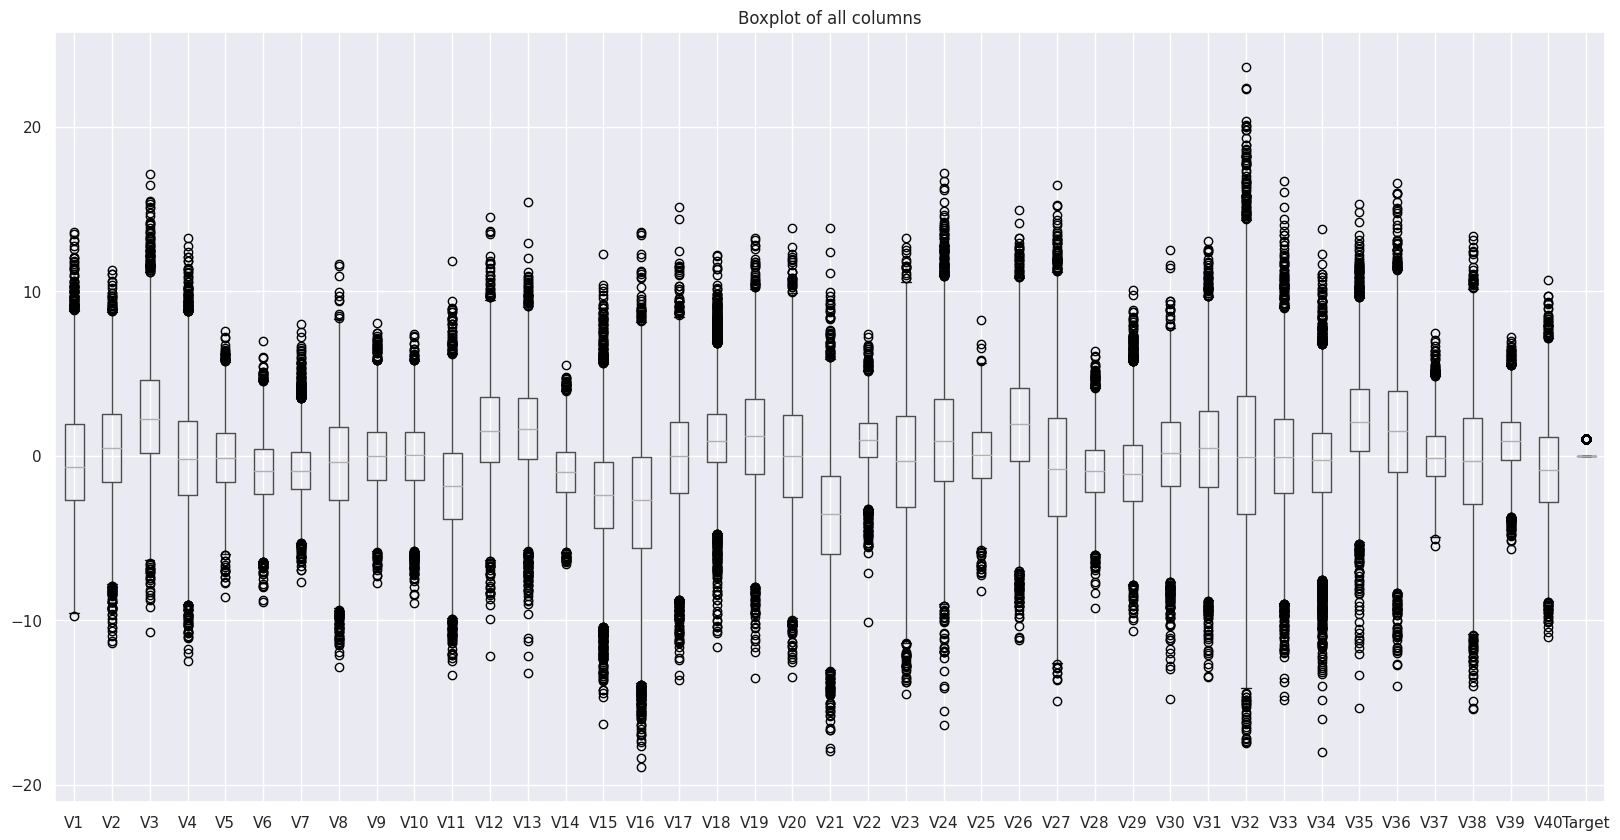

In [ ]:
plt.figure(figsize=(20,10))

data.boxplot();
plt.title('Boxplot of all columns');

- Phạm vi của các biến dường như không khác biệt nhiều.
- Trong tất cả các giá trị đặc trưng, giá trị tối thiểu gần -24 và giá trị tối đa khoảng 25.
- Hầu hết các giá trị nằm giữa 10 và -10.
- Có vẻ như có các giá trị ngoại lai trong mỗi cột của tập dữ liệu.

### Individual Histogram of  Features

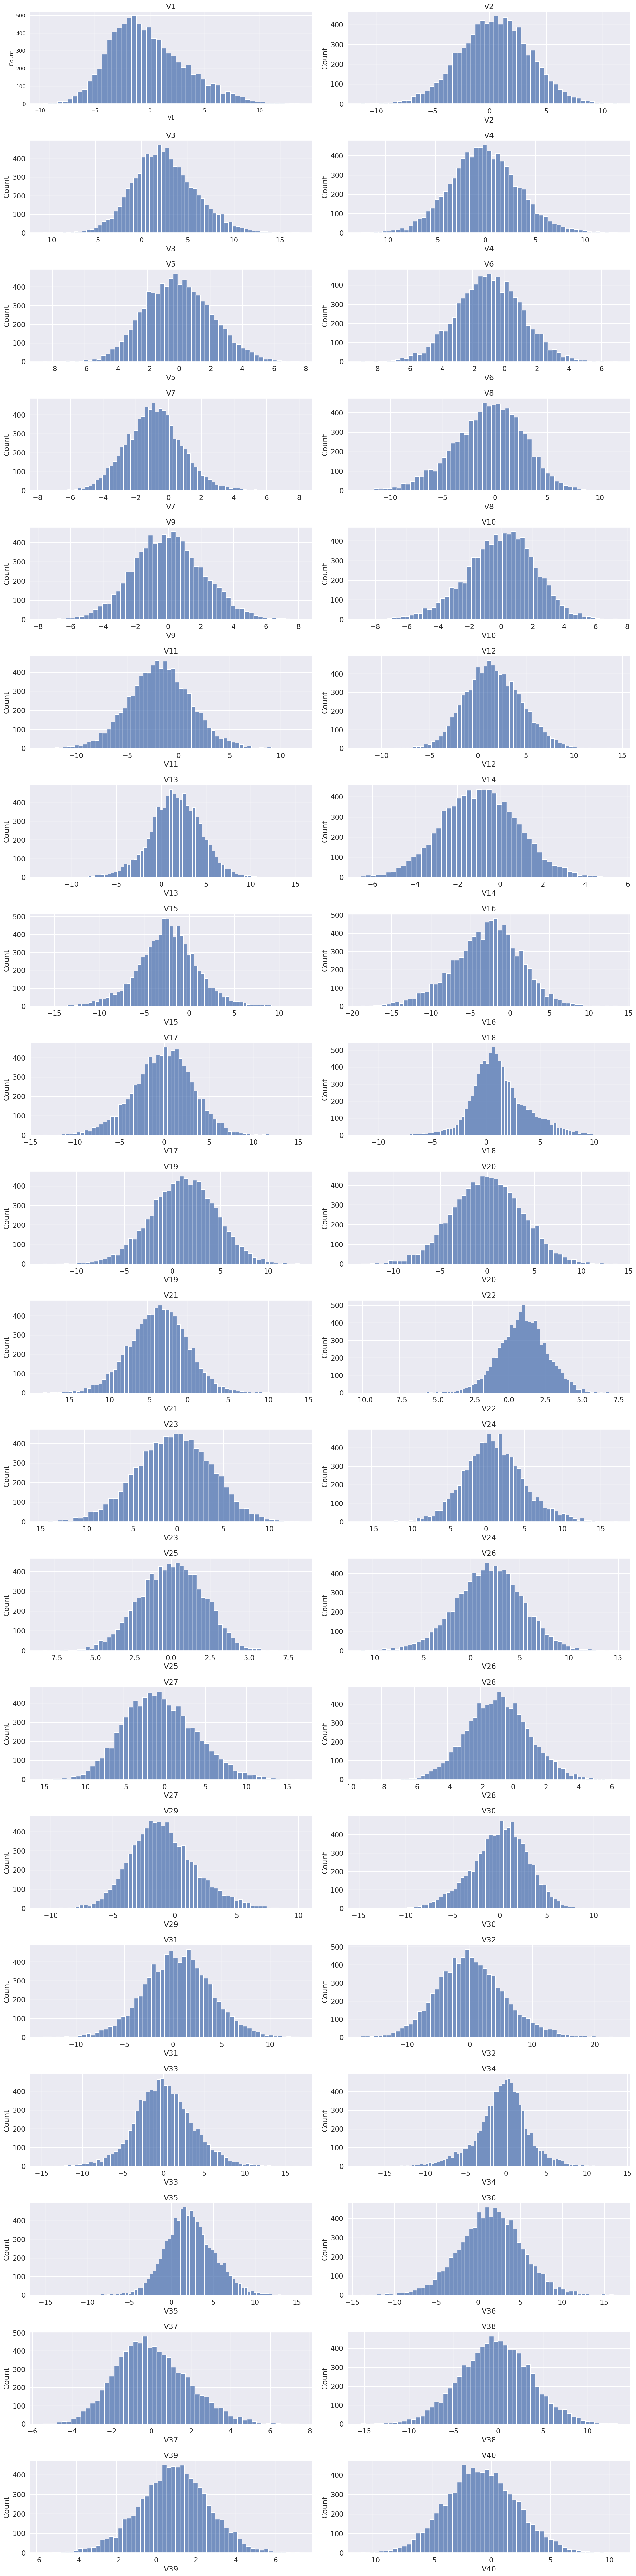

In [ ]:
plt.figure(figsize=(20, 80))

# numerical columns
columns=data.drop(['Target'], axis=1).dtypes[data.drop(['Target'], axis=1).dtypes != 'object'].index

# plot
for i, variable in enumerate(columns):
    plt.subplot(20, 2, i + 1)
    sns.set(font_scale = 1.4)
    sns.histplot(data= data, x=variable)
    plt.tight_layout()
    plt.title(variable)

### Tương quan

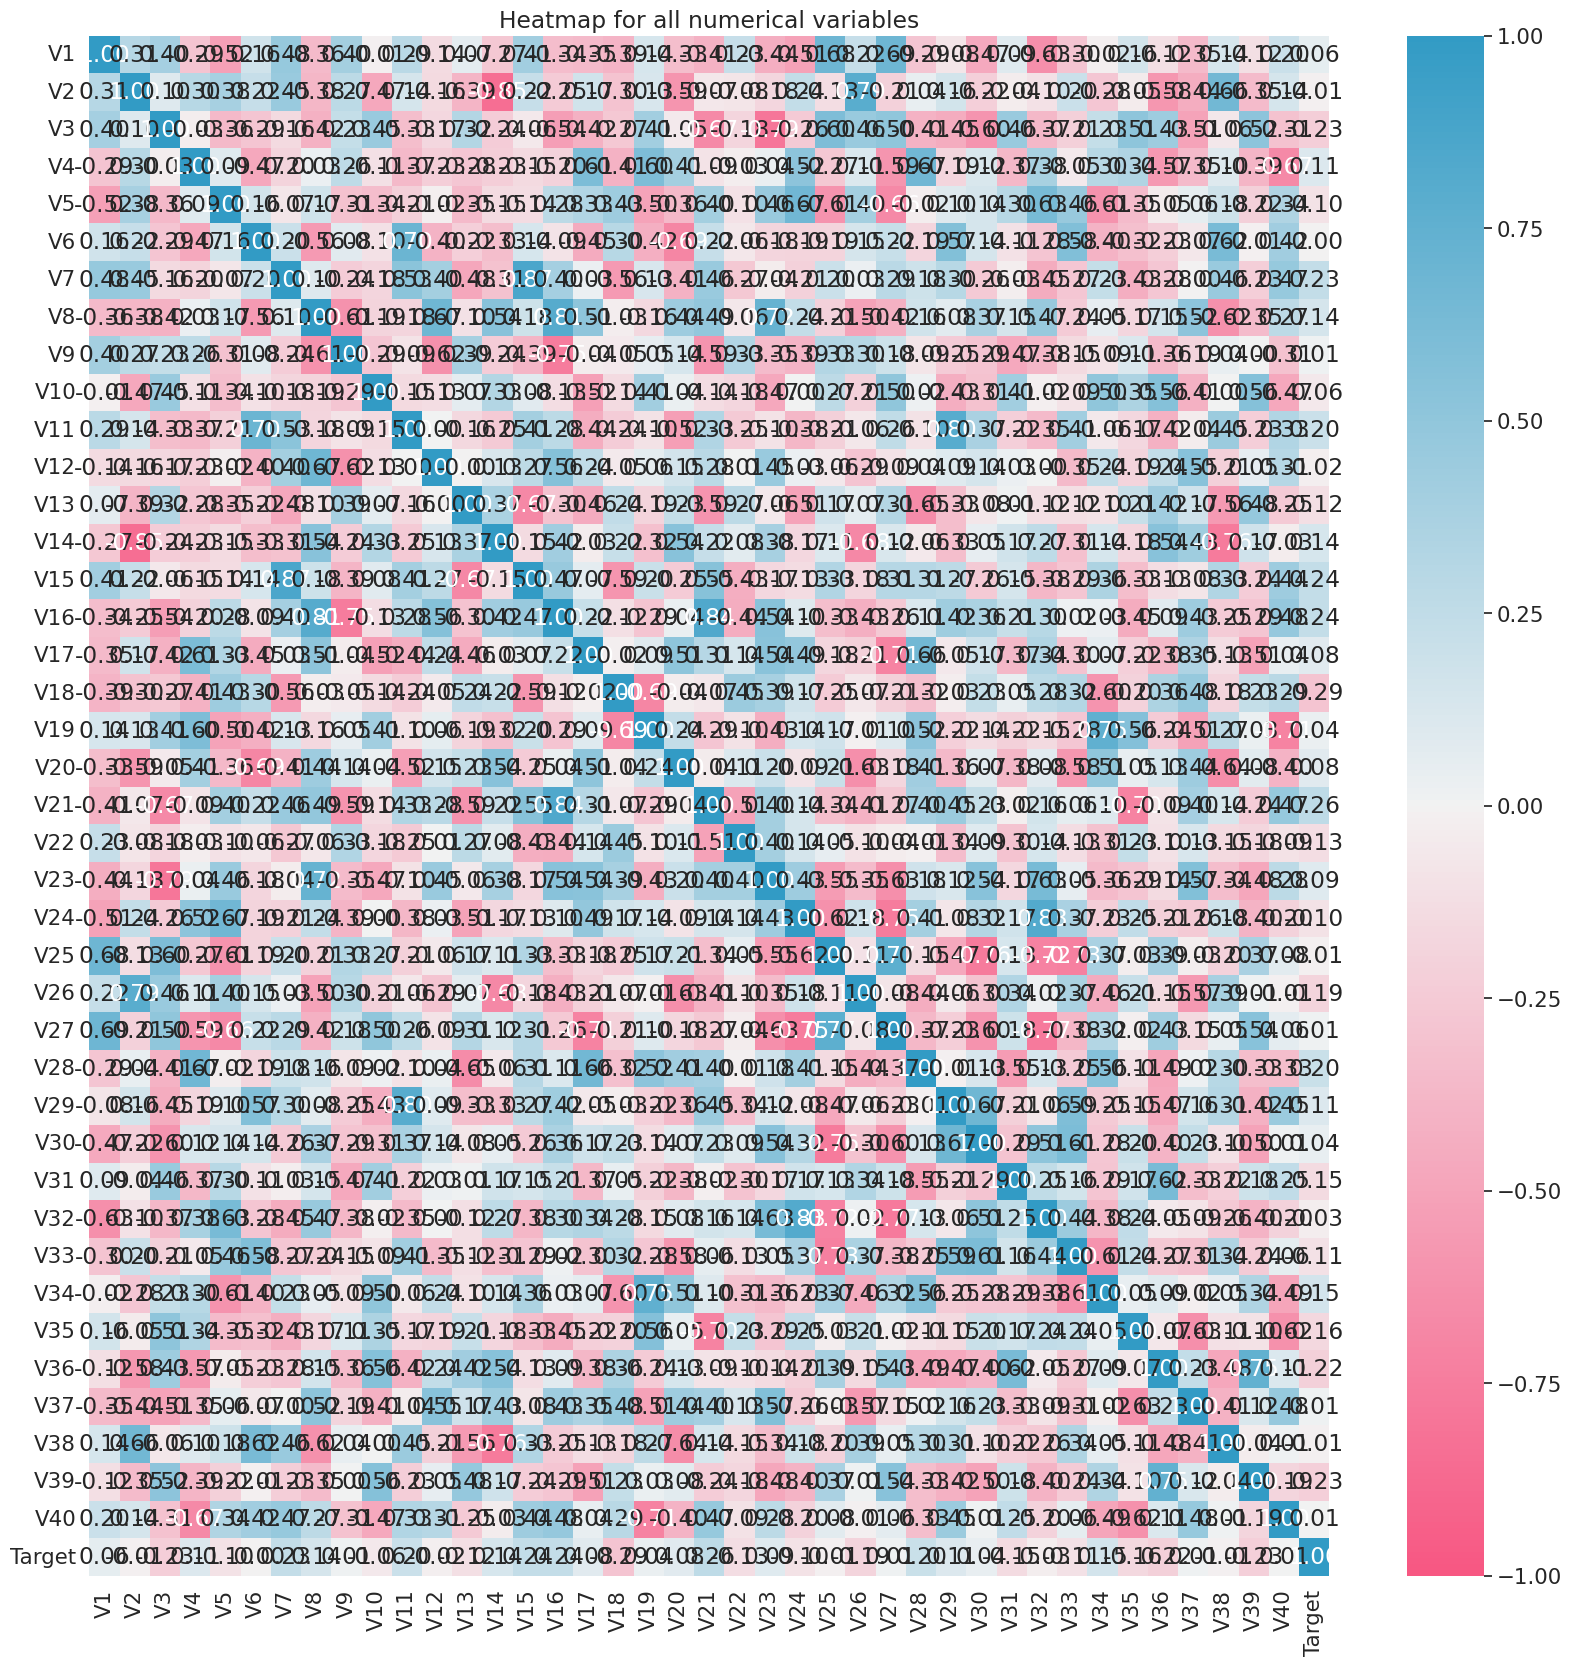

In [ ]:
plt.figure(figsize=(20,20))

# color map
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap=cmap)
plt.title('Heatmap for all numerical variables')
plt.show()

**Highly correlated variables** are listed as follows:

In [ ]:
data_corr=data.corr()
corr_level=0.6

for colname in data.columns:

    print ("\nVaribale *{}* has high positive correlation with the following variables:".format(colname))
    print (data_corr[data_corr[colname]>corr_level][colname].to_string())
    if data_corr[data_corr[colname]<-corr_level][colname].shape[0]==0:
        print ("\nand does not have any high negative correlations.")
    else:
        print ("\nand high negative correlation with:")
        print (data_corr[data_corr[colname]<-corr_level][colname].to_string())
    print('----------------------------------------------------------------------------')


Varibale *V1* has high positive correlation with the following variables:
V1     1.000000
V25    0.680580
V27    0.687485

and high negative correlation with:
V32   -0.628158
----------------------------------------------------------------------------

Varibale *V2* has high positive correlation with the following variables:
V2     1.000000
V26    0.790241
V38    0.658064

and high negative correlation with:
V14   -0.850843
----------------------------------------------------------------------------

Varibale *V3* has high positive correlation with the following variables:
V3    1.0

and high negative correlation with:
V21   -0.665580
V23   -0.790223
V30   -0.601288
----------------------------------------------------------------------------

Varibale *V4* has high positive correlation with the following variables:
V4     1.000000
V17    0.606538
V28    0.666606

and high negative correlation with:
V40   -0.666338
-----------------------------------------------------------------------

- Biến mục tiêu không có mối tương quan tích cực hoặc tiêu cực mạnh với bất kỳ biến dự đoán nào.
- V22 dường như độc lập với phần còn lại của các biến.
- V27 có mối tương quan cao với các biến khác (với 12 biến) trong tập dữ liệu.
- V2 có mối tương quan tiêu cực mạnh với V14. Khi V2 tăng, giá trị của V14 giảm và ngược lại.
- V7 có mối tương quan tích cực mạnh với V15. Khi V7 tăng, giá trị của V15 giảm và ngược lại.
- V8 có mối tương quan tích cực mạnh với V16.
- V11 có mối tương quan tích cực mạnh với V29.
- V16 có mối tương quan tích cực mạnh với V8 và V21.
- V24 có mối tương quan tích cực mạnh với V32.

Mối tương quan giữa các đặc trưng thường không ảnh hưởng đến hiệu suất dự đoán của các mô hình học máy. Tuy nhiên, sau này chúng tôi sẽ loại bỏ các đặc trưng có mối tương quan cao từ dữ liệu. Để tránh việc gây hiểu nhằm với suy luận

### Features vs. Target

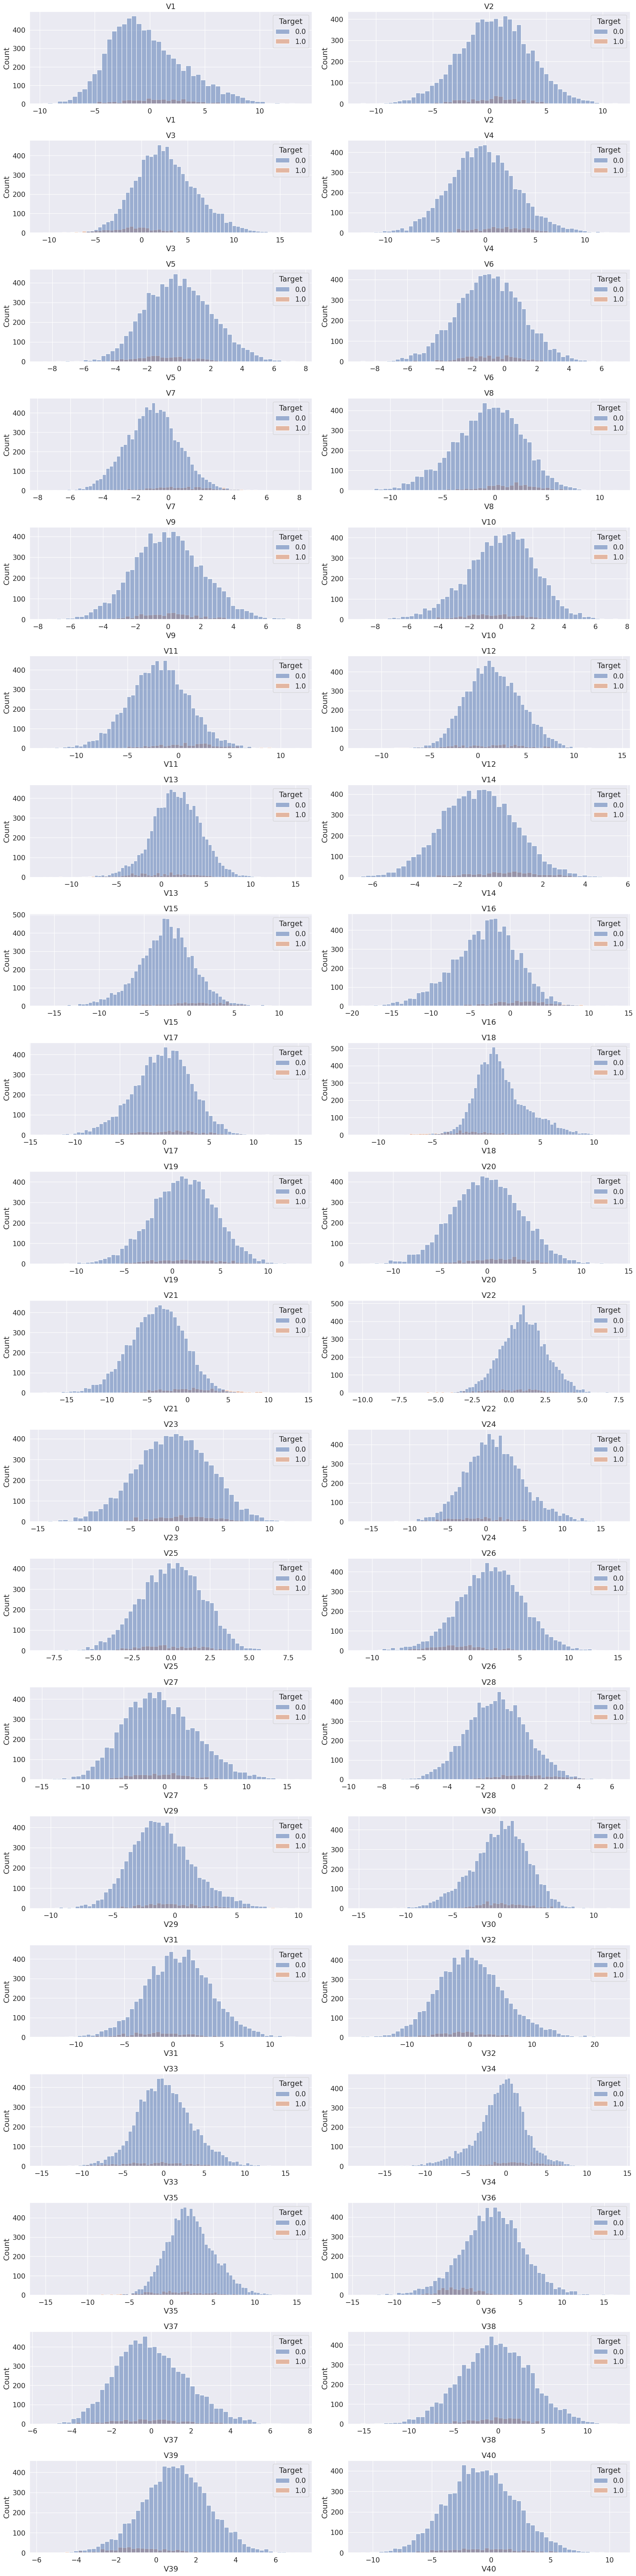

In [ ]:
plt.figure(figsize=(20, 80))

# numerical columns
columns=data.drop(['Target'], axis=1).dtypes[data.drop(['Target'], axis=1).dtypes != 'object'].index

# plot
for i, variable in enumerate(columns):
    plt.subplot(20, 2, i + 1)
    sns.set(font_scale = 1.4)
    sns.histplot(data= data, x=variable, hue='Target')
    plt.tight_layout()
    plt.title(variable)

- Tỷ lệ hỏng máy phát điện ít hơn rất nhiều so với không hỏng.
- Đối với hầu hết các đặc trưng, biến mục tiêu bằng không khi giá trị đặc trưng là cực đại.
- Khi giá trị đặc trưng cực lớn hoặc cực nhỏ, điều đó cho biết không có hỏng máy phát điện.
- Nếu giá trị của V1, V2, V4, V14, V20, V24, V27, V38 hoặc V40 lớn hơn 5 hoặc nhỏ hơn -5, không có hỏng máy phát điện.
- Nếu giá trị của V3, V5, V13, V18, V22, V26, V27, V31, V36 hoặc V39 lớn hơn 5, sẽ không có hỏng máy phát điện. Tuy nhiên, nếu giá trị đặc trưng nhỏ hơn -5, có khả năng máy phát điện sẽ hỏng.
- Nếu giá trị của V7, V8, V11, V15, V16, V17, V20, V21, V28, V29, V3 hoặc V34 nhỏ hơn -5, sẽ không có hỏng máy phát điện. Tuy nhiên, nếu giá trị đặc trưng lớn hơn -5, có khả năng máy phát điện sẽ hỏng.

# <a name='link3'>  3. Data Pre-processing (EDA)</a>


### 3.1 Data Preparation for Modeling

Chuẩn bị data cho các model




In [ ]:
# Make a copy of the data
data1 = data.copy()

# Count the number of duplicates in rows
data1.duplicated().sum()
print('Among the {} rows of the dataframe {} rows are unique and {} rows are duplicates.'.format(data.shape[0] , (~data.duplicated()).sum(), data.duplicated().sum()))

Among the 8410 rows of the dataframe 8410 rows are unique and 0 rows are duplicates.


##### Chia train và test cho dữ liệu

In [ ]:
##### Defining predictors(x) and target (y) variables in data1
data1 = data1.dropna()
X=data1.drop(['Target'], axis=1)
y=data1[['Target']]

# We already have a test set which we will later upload
# We only need to split data1 into train and validation sets in 75:25 ratio

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.25, random_state=1, stratify=y
)

##### Reading test data

In [ ]:
#importing Test DataFrame with the name "Test.csv"
data_test=pd.read_csv('Test.csv')

# Seperating X and Y variables
X_test=data_test.drop(['Target'], axis=1)
y_test=data_test[['Target']]

In [ ]:
print("Number of rows in train data =", X_train.shape[0]);
print("Number of rows in validation data =", X_val.shape[0]);
print("Number of rows in test data =", X_test.shape[0]);

Number of rows in train data = 6298
Number of rows in validation data = 2100
Number of rows in test data = 5000


In [ ]:
target='Target'

print("\nNumber (percentage) of {} is as follow:".format(target))

print("\nWhole DataFrame:")
print("failure:      {0} ({1:2.2f}%)".format(data1[target].value_counts()[1], data1[target].value_counts(normalize=True)[1] * 100 ))
print("no failure:   {0} ({1:2.2f}%)".format(data1[target].value_counts()[0], data1[target].value_counts(normalize=True)[0] * 100 ))


print("\nTraining Set:")
print("failure:      {0} ({1:2.2f}%)".format(y_train[target].value_counts()[1], y_train[target].value_counts(normalize=True)[1] * 100 ))
print("no failure:   {0} ({1:2.2f}%)".format(y_train[target].value_counts()[0], y_train[target].value_counts(normalize=True)[0] * 100 ))

print("\nValidation Set:")
print("failure:      {0} ({1:2.2f}%)".format(y_val[target].value_counts()[1], y_val[target].value_counts(normalize=True)[1] * 100 ))
print("no failure:   {0} ({1:2.2f}%)".format(y_val[target].value_counts()[0], y_val[target].value_counts(normalize=True)[0] * 100 ))


print("\nTest Set:")
print("failure:      {0} ({1:2.2f}%)".format(y_test[target].value_counts()[1], y_test[target].value_counts(normalize=True)[1] * 100 ))
print("no failure:   {0} ({1:2.2f}%)".format(y_test[target].value_counts()[0], y_test[target].value_counts(normalize=True)[0] * 100 ))


Number (percentage) of Target is as follow:

Whole DataFrame:
failure:      454 (5.41%)
no failure:   7944 (94.59%)

Training Set:
failure:      340 (5.40%)
no failure:   5958 (94.60%)

Validation Set:
failure:      114 (5.43%)
no failure:   1986 (94.57%)

Test Set:
failure:      282 (5.64%)
no failure:   4718 (94.36%)



Các tập dữ liệu là **mất cân bằng** vì tỷ lệ hỏng máy phát điện gần 5.47% trong số tất cả các trường hợp.

### 3.3 Missing-Value Treatment

Dữ liệu có các missing value cần đáng quan tâm

In [ ]:
print('Number of missing valuse in train set:')
print(X_train.isnull().sum()[X_train.isnull().sum()>0].to_string())

print('\nNumber of missing valuse in validation set:')
print(X_val.isnull().sum()[X_val.isnull().sum()>0].to_string())

print('\nNumber of missing valuse in test set:')
print(X_test.isnull().sum()[X_test.isnull().sum()>0].to_string())

Number of missing valuse in train set:
Series([], )

Number of missing valuse in validation set:
Series([], )

Number of missing valuse in test set:
V1    5
V2    6


In [ ]:
print('Number of missing valuse in train set = {}.'.format(X_train.isnull().sum().sum()))
print('Number of missing valuse in validation set = {}.'.format(X_val.isnull().sum().sum()))
print('Number of missing valuse in test set = {}.'.format(X_test.isnull().sum().sum()))

Number of missing valuse in train set = 0.
Number of missing valuse in validation set = 0.
Number of missing valuse in test set = 11.


### 3.4 Outlier Detection and Treatment

CHúng tôi sẽ loại các outlier theo IQR
##### Outlier Detection:
DÙng boxplot để xem chúng

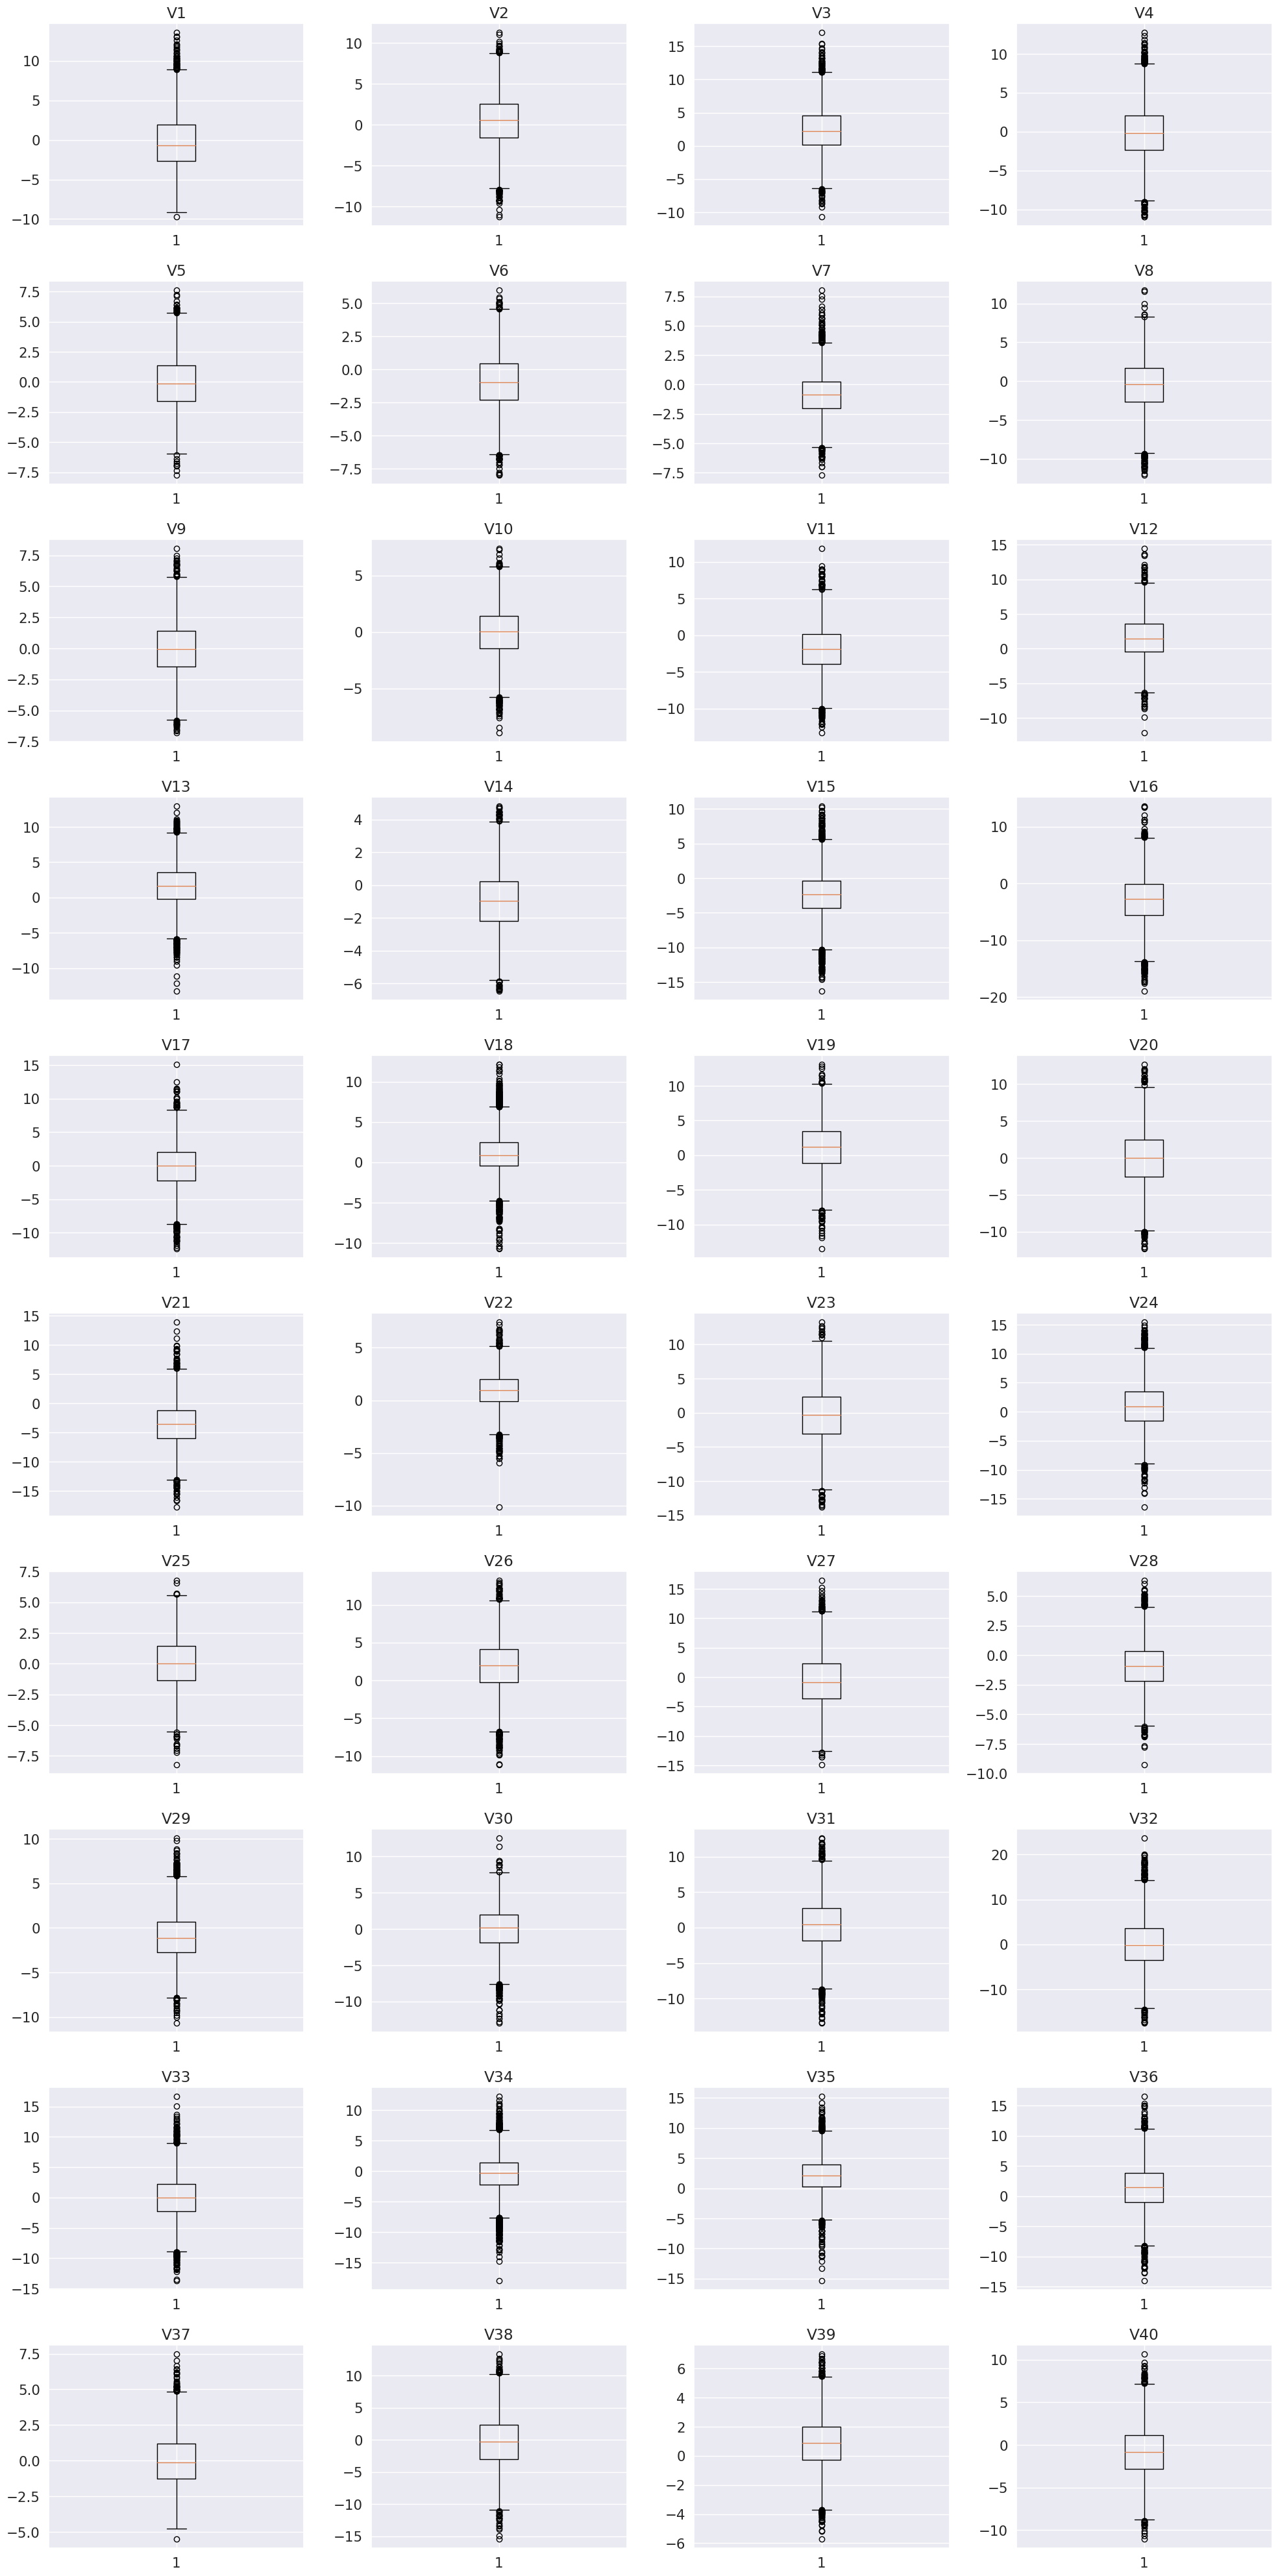

In [ ]:
plt.figure(figsize=(20, 40))

# numerical columns
columns=X_train.dtypes[X_train.dtypes != 'object'].index

# plot
for i, variable in enumerate(columns):
    plt.subplot(10, 4, i + 1)
    plt.boxplot(X_train[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

[văn bản liên kết](https://)All quantitative variables have outliers.

##### Outlier Treatment on training, validation, and test sets:
Chúng tôi xử lý các giá trị ngoại lai trong mỗi tập dữ liệu bằng cách sử dụng giới hạn dưới và giới hạn trên dựa trên thống kê của tập huấn luyện. Trong phần tiếp theo, chúng tôi tạo một hàm để tính toán giới hạn dưới và giới hạn trên của các thuộc tính dữ liệu huấn luyện và sử dụng chúng để cắt các đặc trưng trong các tập huấn luyện, xác thực hoặc kiểm tra. Chúng tôi làm điều này vì để tránh rò rỉ dữ liệu, bất kỳ biến đổi dữ liệu nào trên các tập dữ liệu cũng nên dựa trên thống kê của tập huấn luyện.

In [ ]:
#Create function to treat outliers based on training IQR
def treat_outliers_func(x):
    """
    treats outliers in dataframe x
    """
    # using X_train as a global dataframe
    global X_train

    # calculating lower whisker and upper whiskers based on training data
    Q1 = X_train[x.name].quantile(0.25)  # 25th quantile
    Q3 = X_train[x.name].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Train_Lower_Whisker = Q1 - 1.5 * IQR
    Train_Upper_Whisker = Q3 + 1.5 * IQR

    # clipping x dataframe with lower and upper whiskers of the training data
    # assigning the value of Train_Lower_Whisker to the values in X data columns that are smaller than Train_Lower_Whisker
    # assigning the value of Train_Upper_Whisker to the values in X data columns that are greater than Train_Lower_Whisker

    x = np.clip(x, Train_Lower_Whisker, Train_Upper_Whisker)

    return x

In [ ]:
#Treating outliers in train set
X_train=X_train.apply(treat_outliers_func, axis=0)

#Treating outliers in validation set
X_val=X_val.apply(treat_outliers_func, axis=0)

#Treating outliers in test set
X_test=X_test.apply(treat_outliers_func, axis=0)


boxplot of training data features


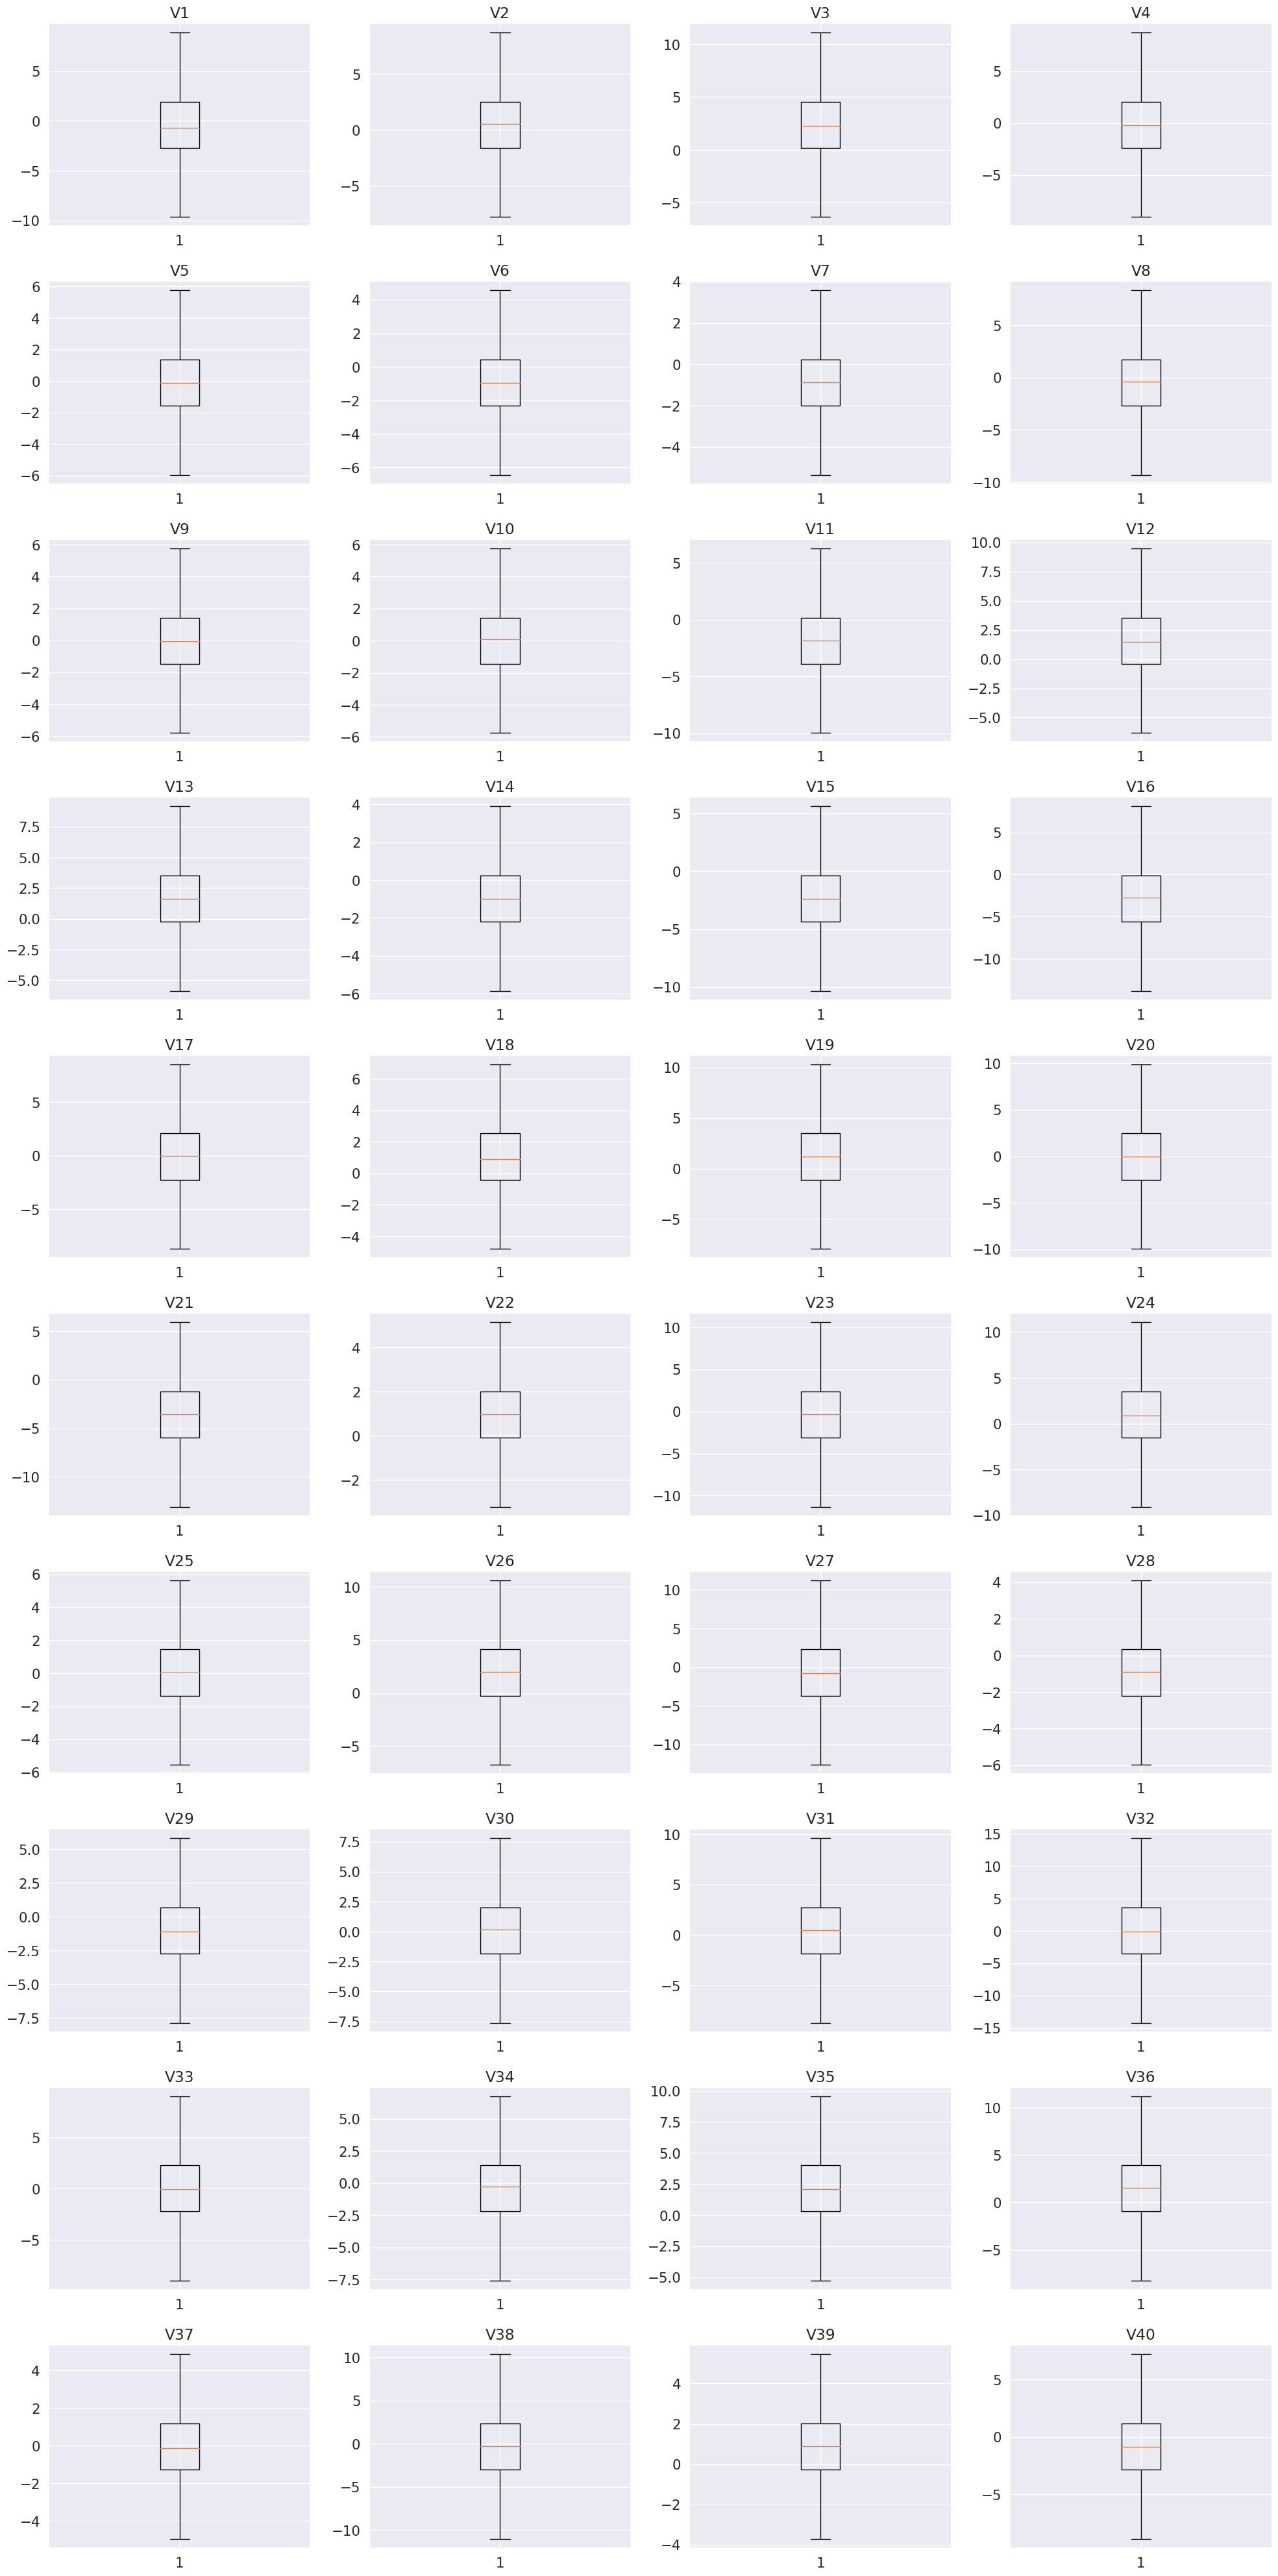

In [ ]:
plt.figure(figsize=(20, 40))

df=X_train

# numerical columns
columns=df.dtypes[df.dtypes != 'object'].index

print('\nboxplot of training data features')

# plot
for i, variable in enumerate(columns):
    plt.subplot(10, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)


boxplot of validation data features


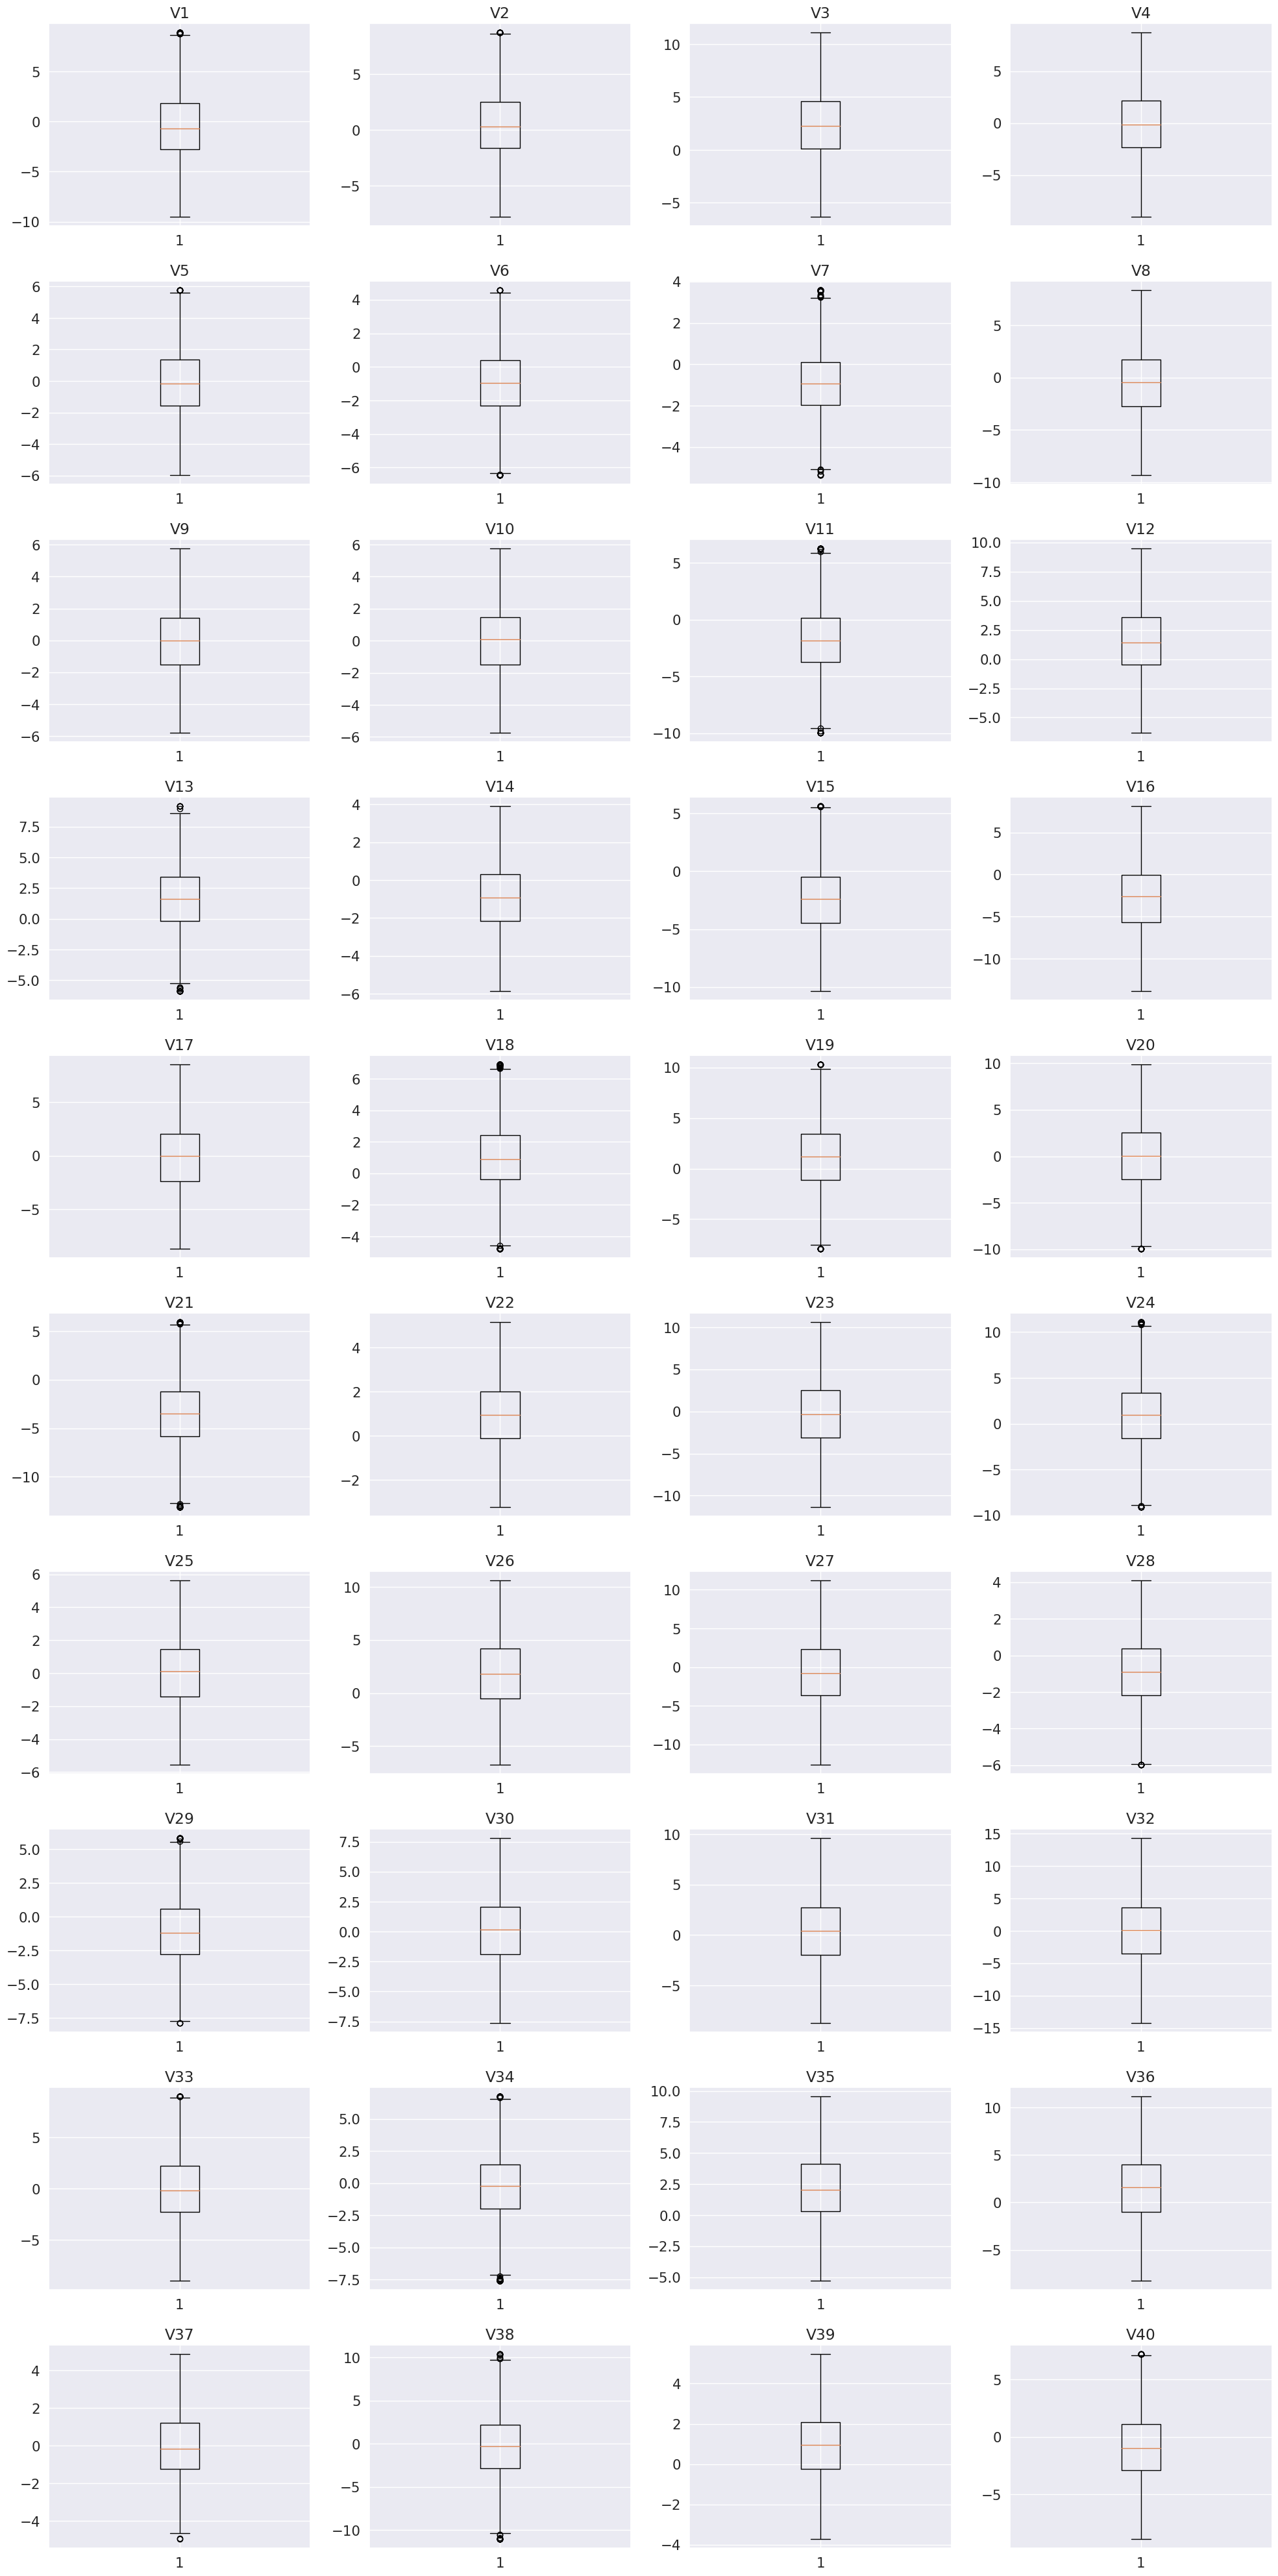

In [ ]:
plt.figure(figsize=(20, 40))

df=X_val

# numerical columns
columns=df.dtypes[df.dtypes != 'object'].index

print('\nboxplot of validation data features')

# plot
for i, variable in enumerate(columns):
    plt.subplot(10, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

### 3.4 Removing Highly Correlated Features

Sự tương quan đồng biến xảy ra khi các biến dự đoán trong một mô hình có mối tương quan cao. Loại bỏ các đặc trưng tương quan có thể cải thiện khả năng tổng quát hóa và tính giải thích của mô hình.

In [ ]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe x with a correlation coefficient
        greater than the threshold.
    '''

    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                #print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    global drops
    drops = set(drop_cols)
    x.drop(columns=drops, axis=1, inplace=True)
    print('Removed Columns are {}'.format(drops))
    return x

In [ ]:
#Removing correlated features from training data
X_train= remove_collinear_features(X_train, 0.7) #Passing DataFrame and Threshold value

#Removing correlated features from validation data
X_val.drop(columns=drops, axis=1, inplace=True)

#Removing correlated features from test data
X_test.drop(columns=drops, axis=1, inplace=True)

Removed Columns are {'V33', 'V16', 'V34', 'V26', 'V21', 'V40', 'V23', 'V38', 'V29', 'V30', 'V27', 'V15', 'V11', 'V32', 'V39', 'V14'}


# <a name='link4'>  4. Model Evaluation Criterion </a>

#### Ba loại chi phí liên quan đến vấn đề đã cung cấp
1. Chi phí thay thế - False Negatives - Dự đoán không có hỏng, trong khi có hỏng
2. Chi phí kiểm tra - False Positives - Dự đoán có hỏng, trong khi không có hỏng
3. Chi phí sửa chữa - True Positives - Dự đoán hỏng một cách chính xác

#### Làm thế nào để giảm tổng chi phí?
* Chúng ta cần tạo một phương pháp đo lường được tùy chỉnh, có thể giúp giảm tổng chi phí.
* Chi phí liên quan đến bất kỳ mô hình nào = TP * 15000 + FP * 5000 + FN * 40000
* Và chi phí tối thiểu có thể là khi, mô hình sẽ có thể xác định tất cả các lỗi, trong trường hợp đó, chi phí sẽ là (TP + FN) * 15000
* Vì vậy, chúng ta sẽ cố gắng tối đa hóa `Chi phí tối thiểu/Chi phí liên quan đến mô hình`

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    TP = confusion_matrix(target, model.predict(predictors))[1, 1]
    FP = confusion_matrix(target, model.predict(predictors))[0, 1]
    FN = confusion_matrix(target, model.predict(predictors))[1, 0]
    Cost = TP * 15 + FP * 5 + FN * 40  # maintenance cost by using model
    Min_Cost = (TP + FN) * 15  # minimum possible maintenance cost = number of actual positives
    Percent = Min_Cost / Cost  # ratio of minimum possible maintenance cost and maintenance cost by model

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
            "Minimum_Vs_Model_cost": Percent,
        },
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)


    sns.set(font_scale = 1.1)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="", cmap="Greens_r")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
# defining metric to be used for optimization and cross-validation
def Minimum_Vs_Model_cost(y_train, y_pred):

    TP = confusion_matrix(y_train, y_pred)[1, 1]
    FP = confusion_matrix(y_train, y_pred)[0, 1]
    FN = confusion_matrix(y_train, y_pred)[1, 0]
    return ((TP + FN) * 15) / (TP * 15 + FP * 5 + FN * 40)

scoring = metrics.make_scorer(Minimum_Vs_Model_cost, greater_is_better=True)

# <a name='link5'>  5. Model Building with Original Data </a>

### 5.1- Classifying Models

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("LR", LogisticRegression(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random Forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

### 5.2 Đánh giá Hiệu suất Mô hình

#### Kiểm tra chéo trên Dữ liệu Huấn luyện

- `Kiểm tra chéo K-Folds` cung cấp các chỉ số tập dữ liệu để chia dữ liệu thành các tập huấn luyện / xác thực. Chia tập dữ liệu thành k fold có tính đồng nhất (không trộn lẫn theo mặc định). Mỗi fold sau đó được sử dụng một lần làm tập xác thực trong khi k - 1 fold còn lại hình thành tập huấn luyện.

- `Stratified K-fold` là một biến thể của KFold trả về các fold có tính đồng nhất. Các fold được tạo ra bằng cách bảo toàn tỷ lệ mẫu cho mỗi lớp.

In [ ]:
# loop through all models to get the mean cross validated score
for name, model in models:
    scoring = scoring
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)

In [ ]:
print('\nSummary Statistics of CV Scores on Training Set:')
df_CV_score = pd.DataFrame()
df_CV_score[" "] = names
df_CV_score["Min"] = np.array(results).min(axis=1)
df_CV_score["Average"] = np.array(results).mean(axis=1)
df_CV_score["Max"] = np.array(results).max(axis=1)
df_CV_score["STD"] = np.array(results).std(axis=1)
df_CV_score.set_index(' ',inplace=True)
df_CV_score.T


Summary Statistics of CV Scores on Training Set:


LR     dtree   Bagging  Random Forest       GBM  Adaboost  \
Min      0.524422  0.557377  0.587896       0.538259  0.554348  0.551351   
Average  0.559155  0.606387  0.621290       0.599256  0.628011  0.579105   
Max      0.603550  0.655949  0.664495       0.637500  0.693878  0.605341   
STD      0.025827  0.032661  0.027771       0.037298  0.054859  0.017733   

          Xgboost  
Min      0.645570  
Average  0.711822  
Max      0.755556  
STD      0.045501

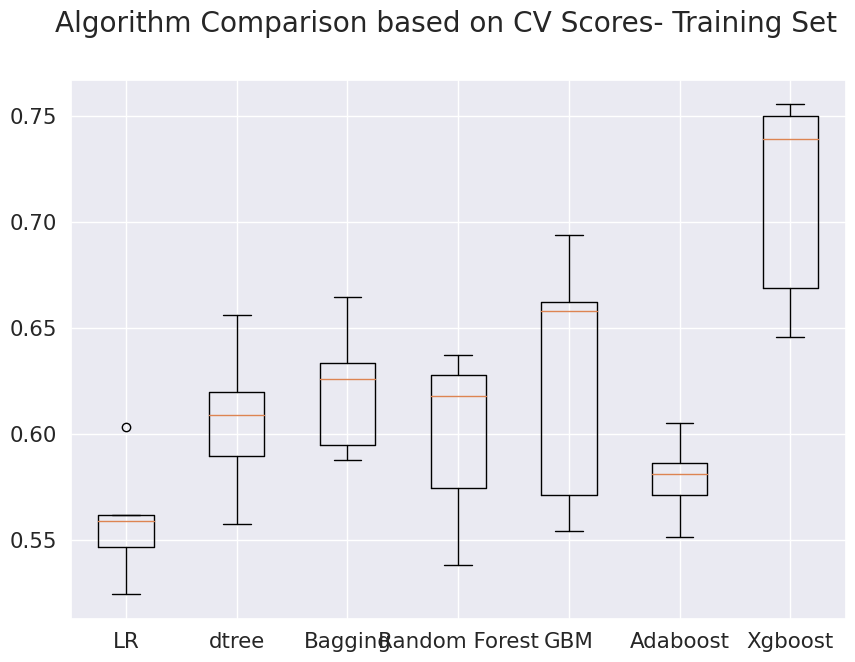

In [ ]:
# Boxplots for CV scores of all models on Training Set
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison based on CV Scores- Training Set")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

#### Model Performance on Training Data

In [ ]:
# creating empty data frame With NaN values
df_metrics_train = pd.DataFrame(columns = ['Accuracy', 'Recall', 'Precision', 'F1', 'Minimum_Vs_Model_cost'])

# adding rows to the empty data frame
for name, model in models:
    df_metrics_train.loc[name] = model_performance_classification_sklearn(model.fit(X_train, y_train), X_train, y_train).loc[0]

df_metrics_train

Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
LR             0.972849  0.561765   0.896714  0.690778               0.570789
dtree          1.000000  1.000000   1.000000  1.000000               1.000000
Bagging        0.996983  0.944118   1.000000  0.971256               0.914798
Random Forest  0.999841  0.997059   1.000000  0.998527               0.995122
GBM            0.993172  0.882353   0.990099  0.933126               0.834015
Adaboost       0.978247  0.670588   0.901186  0.768971               0.635514
Xgboost        1.000000  1.000000   1.000000  1.000000               1.000000

#### Model Performance on Validation Data

In [ ]:
# creating empty data frame With NaN values
df_metrics_val = pd.DataFrame(columns = ['Accuracy', 'Recall', 'Precision', 'F1', 'Minimum_Vs_Model_cost'])

# adding rows to the empty data frame
for name, model in models:
    df_metrics_val.loc[name] = model_performance_classification_sklearn(model.fit(X_train, y_train), X_val, y_val).loc[0]

df_metrics_val

Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
LR             0.967143  0.552632   0.777778  0.646154               0.556098
dtree          0.954286  0.526316   0.588235  0.555556               0.522936
Bagging        0.978095  0.631579   0.947368  0.757895               0.615108
Random Forest  0.980476  0.649123   0.986667  0.783069               0.629834
GBM            0.979048  0.675439   0.916667  0.777778               0.640449
Adaboost       0.969048  0.587719   0.788235  0.673367               0.574790
Xgboost        0.984286  0.754386   0.945055  0.839024               0.702259

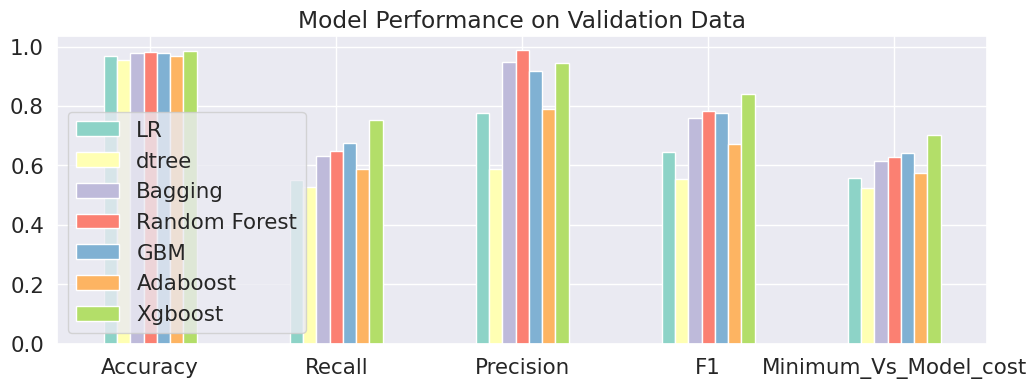

In [ ]:
#setting color
color=sns. set_palette("Set3");

#plotting
df_metrics_val.T.plot(kind="bar", figsize=(12, 4));
plt.legend(df_metrics_val.T.columns.tolist(), loc='lower left');
plt.xticks(rotation=0);
plt.title('Model Performance on Validation Data');

# <a name='link6'>  6. Model Building with OverSampled Data </a>

### 6.1- OverSampled Data

In [ ]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

print("\nNumber (percentage) of {} in the oversampled training set:".format(target))
print("failure:      {0} ({1:2.2f}%)".format(y_train_over[target].value_counts()[1], y_train_over[target].value_counts(normalize=True)[1] * 100 ))
print("no failure:   {0} ({1:2.2f}%)".format(y_train_over[target].value_counts()[0], y_train_over[target].value_counts(normalize=True)[0] * 100 ))



Number (percentage) of Target in the oversampled training set:
failure:      5958 (50.00%)
no failure:   5958 (50.00%)


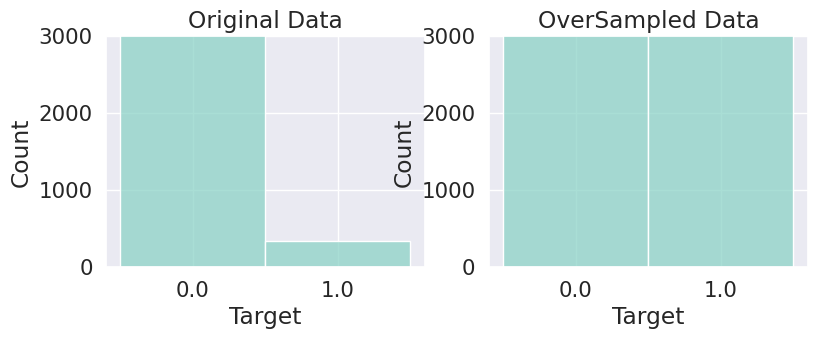

In [ ]:
#plotting
plt.figure(figsize=(14, 3))

plt.subplot(1, 3, 1)
ax=sns.histplot(y_train['Target'].apply(str));
plt.ylim([0, 3000]);
plt.title('Original Data');

plt.subplot(1, 3, 2)
ax=sns.histplot(y_train_over['Target'].apply(str));
plt.ylim([0, 3000]);
plt.title('OverSampled Data');

### 6.2- Classifying Models

In [ ]:
models_over = []  # Empty list to store all the models

# Appending models into the list
models_over.append(("LR_over", LogisticRegression(random_state=1)))
models_over.append(("dtree_over", DecisionTreeClassifier(random_state=1)))
models_over.append(("Bagging_over", BaggingClassifier(random_state=1)))
models_over.append(("Random Forest_over", RandomForestClassifier(random_state=1)))
models_over.append(("GBM_over", GradientBoostingClassifier(random_state=1)))
models_over.append(("Adaboost_over", AdaBoostClassifier(random_state=1)))
models_over.append(("Xgboost_over", XGBClassifier(random_state=1, eval_metric="logloss")))

results_over = []  # Empty list to store all model's CV scores
names_over = []  # Empty list to store name of the models

### 6.3 Model Performance Evaluation

#### Cross-Validation on OverSampled Training Data

In [ ]:
# loop through all models to get the mean cross validated score
for name, model in models_over:
    scoring = scoring
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
    )
    results_over.append(cv_result)
    names_over.append(name)

In [ ]:
print('\nSummary Statistics of CV Scores on OverSampled Training Set:')
df_CV_score_over = pd.DataFrame()
df_CV_score_over[" "] = names_over
df_CV_score_over["Min"] = np.array(results_over).min(axis=1)
df_CV_score_over["Average"] = np.array(results_over).mean(axis=1)
df_CV_score_over["Max"] = np.array(results_over).max(axis=1)
df_CV_score_over["STD"] = np.array(results_over).std(axis=1)
df_CV_score_over.set_index(' ',inplace=True)
df_CV_score_over.T


Summary Statistics of CV Scores on OverSampled Training Set:


LR_over  dtree_over  Bagging_over  Random Forest_over  GBM_over  \
Min      0.809966    0.923077      0.942247            0.962036  0.899623   
Average  0.827391    0.939500      0.955012            0.971289  0.908531   
Max      0.840818    0.950053      0.960774            0.978636  0.922125   
STD      0.009948    0.009510      0.007079            0.005826  0.007950   

         Adaboost_over  Xgboost_over  
Min           0.858583      0.967506  
Average       0.871595      0.981776  
Max           0.882745      0.991949  
STD           0.008126      0.008056

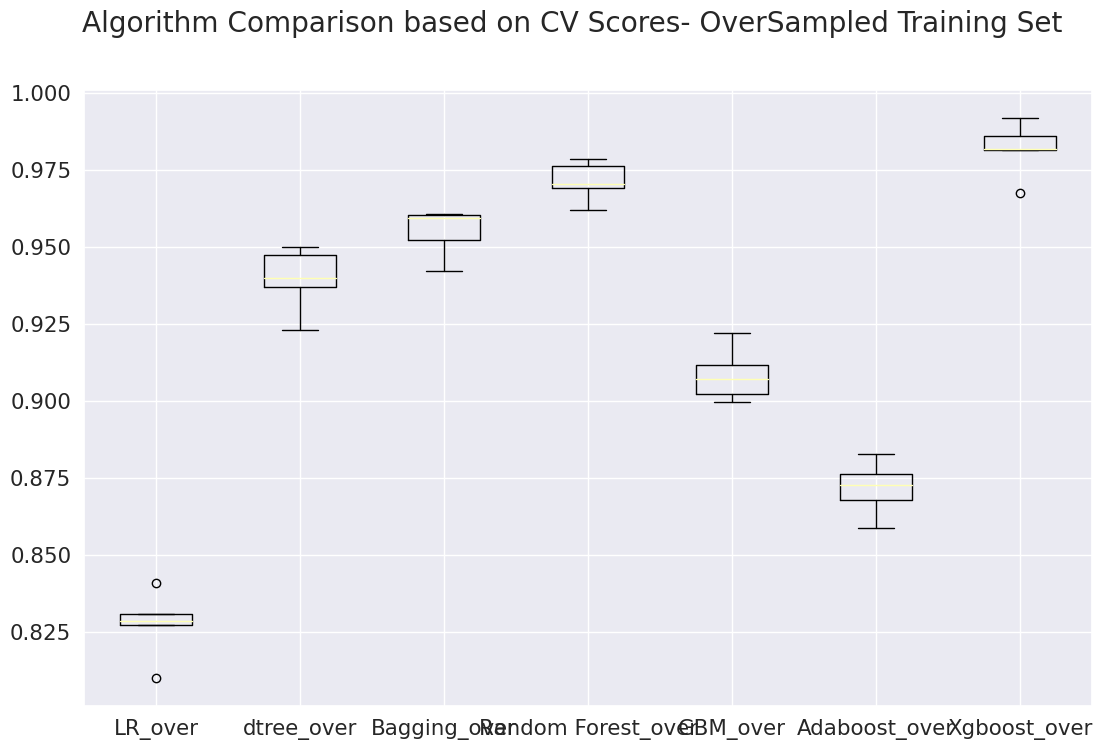

In [ ]:
# Boxplots for CV scores of all models on OverSampled Training Set
fig = plt.figure(figsize=(13, 8))

fig.suptitle("Algorithm Comparison based on CV Scores- OverSampled Training Set")
ax = fig.add_subplot(111)

plt.boxplot(results_over)
ax.set_xticklabels(names_over)

plt.show()

#### Model Performance on Training Data

In [ ]:
# creating empty data frame With NaN values
df_metrics_train_over = pd.DataFrame(columns = ['Accuracy', 'Recall', 'Precision', 'F1', 'Minimum_Vs_Model_cost'])

# adding rows to the empty data frame
for name, model in models_over:
    df_metrics_train_over.loc[name] = model_performance_classification_sklearn(model.fit(X_train_over, y_train_over), X_train_over, y_train_over).loc[0]

df_metrics_train_over

Accuracy    Recall  Precision        F1  \
LR_over             0.896694  0.894763   0.898231  0.896494   
dtree_over          1.000000  1.000000   1.000000  1.000000   
Bagging_over        0.999329  0.998993   0.999664  0.999328   
Random Forest_over  1.000000  1.000000   1.000000  1.000000   
GBM_over            0.965844  0.953508   0.977629  0.965418   
Adaboost_over       0.926066  0.927492   0.924854  0.926171   
Xgboost_over        1.000000  1.000000   1.000000  1.000000   

                    Minimum_Vs_Model_cost  
LR_over                          0.827002  
dtree_over                       1.000000  
Bagging_over                     0.998213  
Random Forest_over               1.000000  
GBM_over                         0.921863  
Adaboost_over                    0.872626  
Xgboost_over                     1.000000

#### Model Performance on Validation Data

In [ ]:
# creating empty data frame With NaN values
df_metrics_val_over = pd.DataFrame(columns = ['Accuracy', 'Recall', 'Precision', 'F1', 'Minimum_Vs_Model_cost'])

# adding rows to the empty data frame
for name, model in models_over:
    df_metrics_val_over.loc[name] = model_performance_classification_sklearn(model.fit(X_train_over, y_train_over), X_val, y_val).loc[0]

df_metrics_val_over

Accuracy    Recall  Precision        F1  \
LR_over             0.888571  0.877193   0.312500  0.460829   
dtree_over          0.945238  0.789474   0.497238  0.610169   
Bagging_over        0.973333  0.780702   0.741667  0.760684   
Random Forest_over  0.983333  0.789474   0.891089  0.837209   
GBM_over            0.956667  0.877193   0.564972  0.687285   
Adaboost_over       0.901905  0.824561   0.335714  0.477157   
Xgboost_over        0.984286  0.842105   0.864865  0.853333   

                    Minimum_Vs_Model_cost  
LR_over                          0.541139  
dtree_over                       0.618445  
Bagging_over                     0.686747  
Random Forest_over               0.723044  
GBM_over                         0.699387  
Adaboost_over                    0.544586  
Xgboost_over                     0.765101

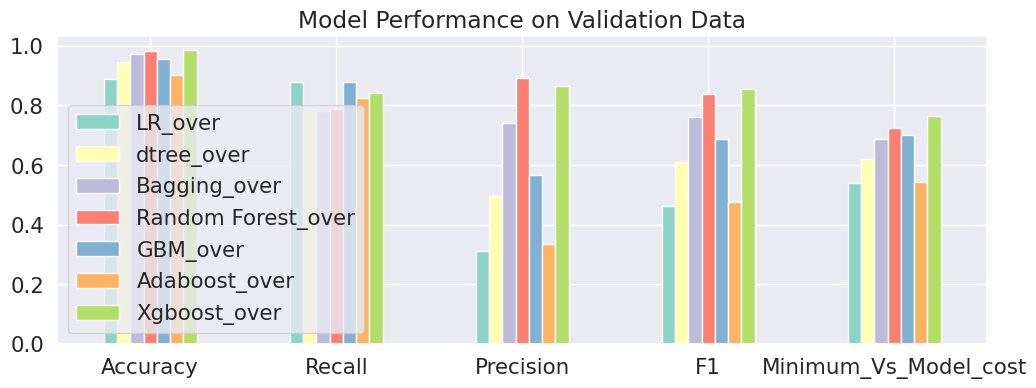

In [ ]:
#setting color
color=sns. set_palette("Set3");

#plotting
df_metrics_val_over.T.plot(kind="bar", figsize=(12, 4));
plt.legend(df_metrics_val_over.T.columns.tolist(), loc='lower left');
plt.xticks(rotation=0);
plt.title('Model Performance on Validation Data');

# <a name='link7'>  7. Model Building with Undersampled data </a>

### 7.1- UnderSampled Data

In [ ]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

print("\nNumber (percentage) of {} in the undersampled training set:".format(target))
print("failure:      {0} ({1:2.2f}%)".format(y_train_un[target].value_counts()[1], y_train_un[target].value_counts(normalize=True)[1] * 100 ))
print("no failure:   {0} ({1:2.2f}%)".format(y_train_un[target].value_counts()[0], y_train_un[target].value_counts(normalize=True)[0] * 100 ))


Number (percentage) of Target in the undersampled training set:
failure:      340 (50.00%)
no failure:   340 (50.00%)


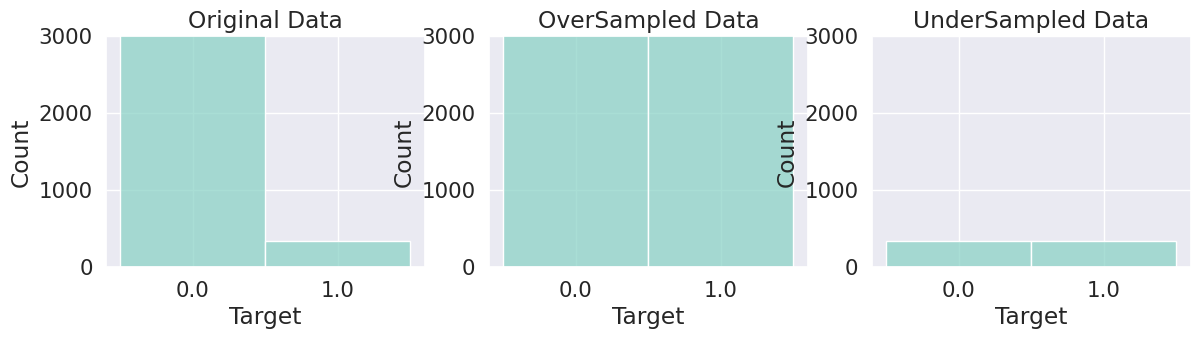

In [ ]:
#plotting
plt.figure(figsize=(14, 3))

plt.subplot(1, 3, 1)
ax=sns.histplot(y_train['Target'].apply(str));
plt.ylim([0, 3000]);
plt.title('Original Data');

plt.subplot(1, 3, 2)
ax=sns.histplot(y_train_over['Target'].apply(str));
plt.ylim([0, 3000]);
plt.title('OverSampled Data');

plt.subplot(1, 3, 3)
ax=sns.histplot(y_train_un['Target'].apply(str));
plt.ylim([0, 3000]);
plt.title('UnderSampled Data');

### 7.2- Classifying Models

In [ ]:
models_un = []  # Empty list to store all the models

# Appending models into the list
models_un.append(("LR_un", LogisticRegression(random_state=1)))
models_un.append(("dtree_un", DecisionTreeClassifier(random_state=1)))
models_un.append(("Bagging_un", BaggingClassifier(random_state=1)))
models_un.append(("Random Forest_un", RandomForestClassifier(random_state=1)))
models_un.append(("GBM_un", GradientBoostingClassifier(random_state=1)))
models_un.append(("Adaboost_un", AdaBoostClassifier(random_state=1)))
models_un.append(("Xgboost_un", XGBClassifier(random_state=1, eval_metric="logloss")))

results_un = []  # Empty list to store all model's CV scores
names_un = []  # Empty list to store name of the models

### 7.3 Model Performance Evaluation

#### Cross Validation on UnderSampled Training Data

In [ ]:
# loop through all models to get the mean cross validated score
for name, model in models_un:
    scoring = scoring
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
    )
    results_un.append(cv_result)
    names_un.append(name)

In [ ]:
print('\nSummary Statistics of CV Scores on UnderSampled Training Set:')
df_CV_score_un = pd.DataFrame()
df_CV_score_un[" "] = names_un
df_CV_score_un["Min"] = np.array(results_un).min(axis=1)
df_CV_score_un["Average"] = np.array(results_un).mean(axis=1)
df_CV_score_un["Max"] = np.array(results_un).max(axis=1)
df_CV_score_un["STD"] = np.array(results_un).std(axis=1)
df_CV_score_un.set_index(' ',inplace=True)
df_CV_score_un.T


Summary Statistics of CV Scores on UnderSampled Training Set:


LR_un  dtree_un  Bagging_un  Random Forest_un    GBM_un  \
Min      0.750000  0.728571    0.720848          0.806324  0.803150   
Average  0.769909  0.749448    0.762561          0.839126  0.827772   
Max      0.812749  0.775665    0.803150          0.879310  0.857143   
STD      0.023203  0.020387    0.032136          0.029116  0.020796   

         Adaboost_un  Xgboost_un  
Min         0.772727    0.806324  
Average     0.795197    0.827528  
Max         0.842975    0.853556  
STD         0.025707    0.015213

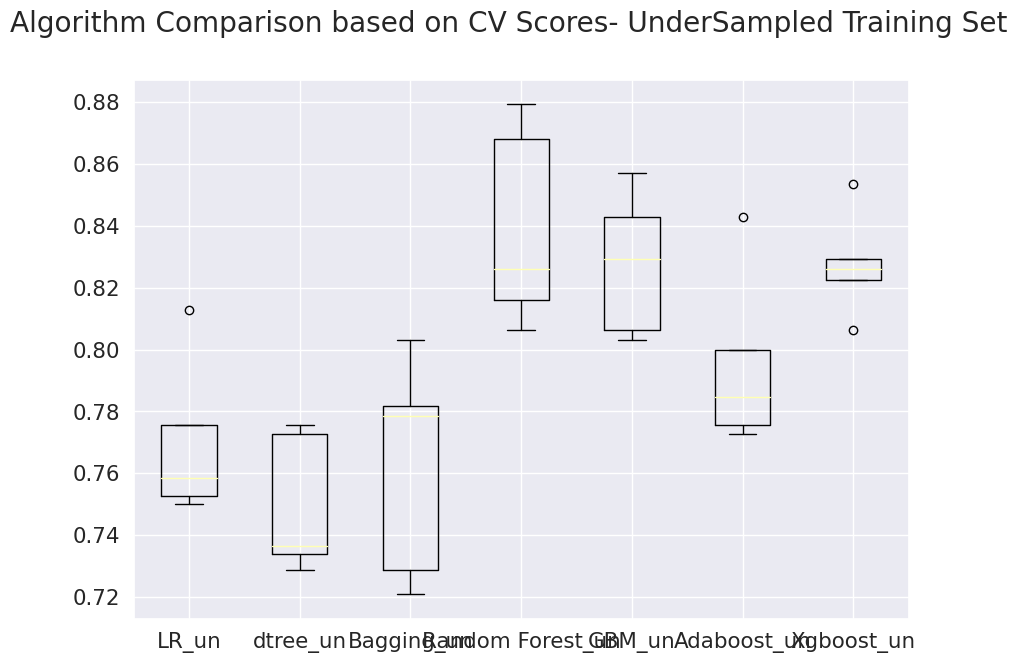

In [ ]:
# Boxplots for CV scores of all models on UnderSampled Training Set
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison based on CV Scores- UnderSampled Training Set")
ax = fig.add_subplot(111)

plt.boxplot(results_un)
ax.set_xticklabels(names_un)

plt.show()

#### Model Performance on Training Data

In [ ]:
# creating empty data frame With NaN values
df_metrics_train_un = pd.DataFrame(columns = ['Accuracy', 'Recall', 'Precision', 'F1', 'Minimum_Vs_Model_cost'])

# adding rows to the empty data frame
for name, model in models_un:
    df_metrics_train_un.loc[name] = model_performance_classification_sklearn(model.fit(X_train_un, y_train_un), X_train_un, y_train_un).loc[0]

df_metrics_train_un

Accuracy    Recall  Precision        F1  \
LR_un             0.873529  0.870588   0.875740  0.873156   
dtree_un          1.000000  1.000000   1.000000  1.000000   
Bagging_un        0.991176  0.988235   0.994083  0.991150   
Random Forest_un  1.000000  1.000000   1.000000  1.000000   
GBM_un            0.989706  0.979412   1.000000  0.989599   
Adaboost_un       0.944118  0.932353   0.954819  0.943452   
Xgboost_un        1.000000  1.000000   1.000000  1.000000   

                  Minimum_Vs_Model_cost  
LR_un                          0.795632  
dtree_un                       1.000000  
Bagging_un                     0.978887  
Random Forest_un               1.000000  
GBM_un                         0.966825  
Adaboost_un                    0.886957  
Xgboost_un                     1.000000

#### Model Performance on Validation Data

In [ ]:
# creating empty data frame With NaN values
df_metrics_val_un = pd.DataFrame(columns = ['Accuracy', 'Recall', 'Precision', 'F1', 'Minimum_Vs_Model_cost'])

# adding rows to the empty data frame
for name, model in models_un:
    df_metrics_val_un.loc[name] = model_performance_classification_sklearn(model.fit(X_train_un, y_train_un), X_val, y_val).loc[0]

df_metrics_val_un

Accuracy    Recall  Precision        F1  \
LR_un             0.878571  0.868421   0.292035  0.437086   
dtree_un          0.806667  0.807018   0.193277  0.311864   
Bagging_un        0.915714  0.807018   0.372470  0.509695   
Random Forest_un  0.931905  0.877193   0.436681  0.583090   
GBM_un            0.918095  0.850877   0.384921  0.530055   
Adaboost_un       0.868571  0.885965   0.277473  0.422594   
Xgboost_un        0.946190  0.877193   0.502513  0.638978   

                  Minimum_Vs_Model_cost  
LR_un                          0.520548  
dtree_un                       0.409091  
Bagging_un                     0.563427  
Random Forest_un               0.632163  
GBM_un                         0.587629  
Adaboost_un                    0.510448  
Xgboost_un                     0.669276

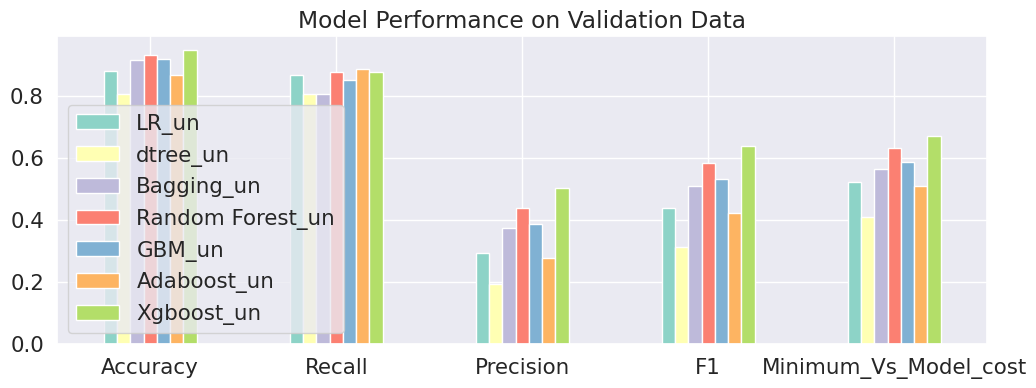

In [ ]:
#setting color
color=sns. set_palette("Set3");

#plotting
df_metrics_val_un.T.plot(kind="bar", figsize=(12, 4));
plt.legend(df_metrics_val_un.T.columns.tolist(), loc='lower left');
plt.xticks(rotation=0);
plt.title('Model Performance on Validation Data');

# <a name='link8'>  8. Model Selection for Tuning </a>

Hãy xem tổng kết các điểm đánh giá trên các mô hình để so sánh hiệu suất của chúng và chọn ba mô hình tốt nhất.

### 8.1 Cross-Validation Score of all Models

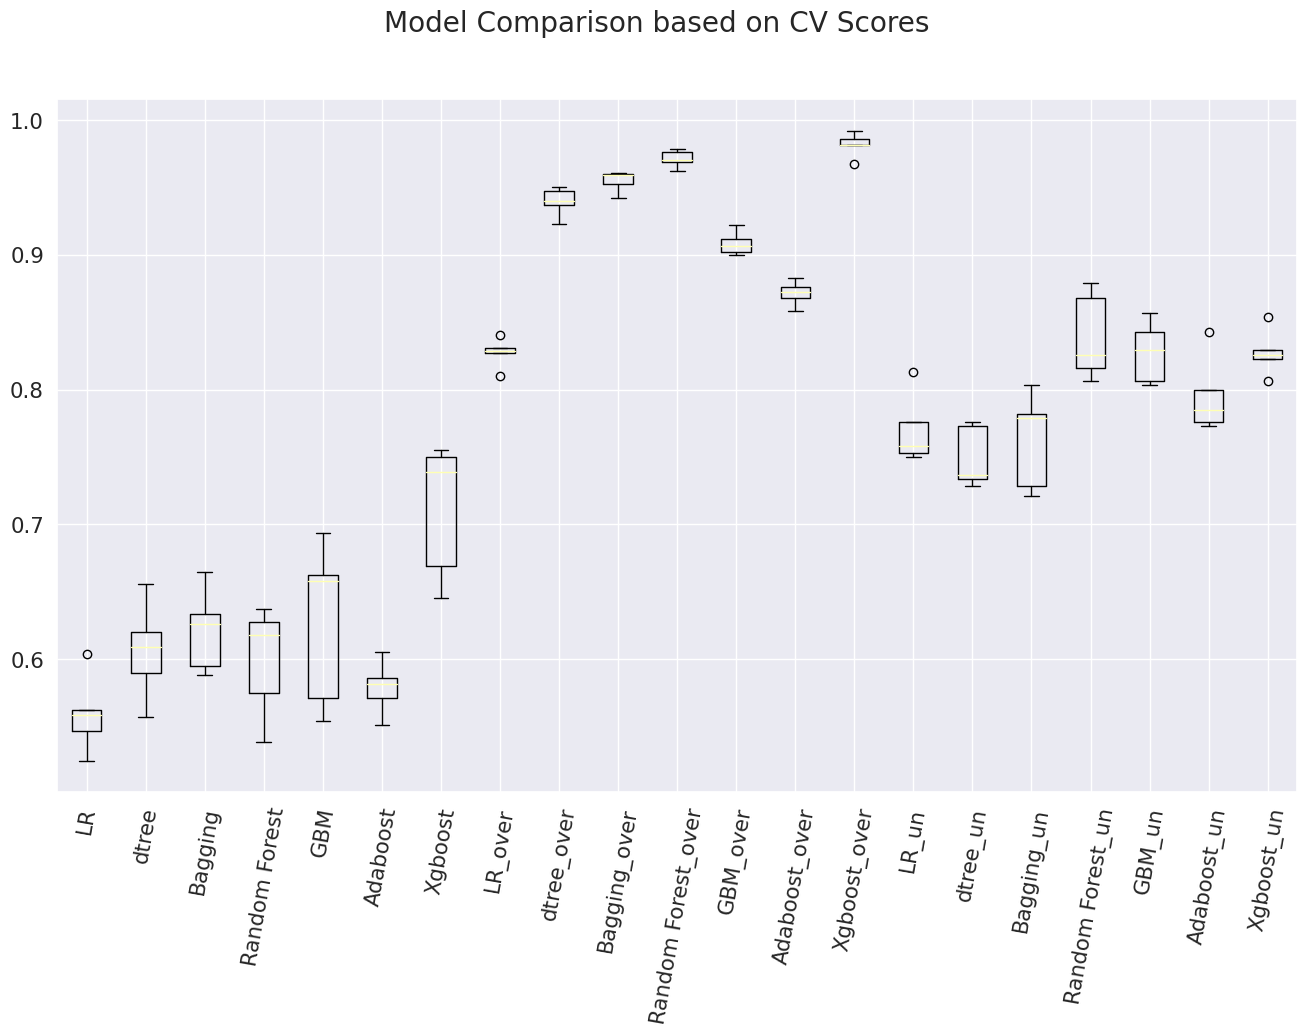

In [ ]:
names_all= names+ names_over+ names_un
results_all= results+ results_over+ results_un

# Boxplots for CV scores of all models
fig = plt.figure(figsize=(16, 9))

fig.suptitle("Model Comparison based on CV Scores")
ax = fig.add_subplot(111)

plt.boxplot(results_all)
ax.set_xticklabels(names_all)
plt.xticks(rotation=80);

plt.show()

* Among the models, **Random Forest_over**, **Xgboost_over**, **Bagging_over**, and **dtree_over** have the best performances because they have higher average CV scores (greater than 0.9) with lower standard deviations.
* LR is the worst model due to its lowest average score (lower than 0.6).

### 8.2 Performance Summary of all Models on Training Set

In [ ]:
models_comp_df_train = pd.concat(
    [ df_metrics_train.T, df_metrics_train_over.T,  df_metrics_train_un.T]
    , axis=1)

print("\nperformance summary of all models on training set:")
models_comp_df_train.T


performance summary of all models on training set:


Accuracy    Recall  Precision        F1  \
LR                  0.972849  0.561765   0.896714  0.690778   
dtree               1.000000  1.000000   1.000000  1.000000   
Bagging             0.996983  0.944118   1.000000  0.971256   
Random Forest       0.999841  0.997059   1.000000  0.998527   
GBM                 0.993172  0.882353   0.990099  0.933126   
Adaboost            0.978247  0.670588   0.901186  0.768971   
Xgboost             1.000000  1.000000   1.000000  1.000000   
LR_over             0.896694  0.894763   0.898231  0.896494   
dtree_over          1.000000  1.000000   1.000000  1.000000   
Bagging_over        0.999329  0.998993   0.999664  0.999328   
Random Forest_over  1.000000  1.000000   1.000000  1.000000   
GBM_over            0.965844  0.953508   0.977629  0.965418   
Adaboost_over       0.926066  0.927492   0.924854  0.926171   
Xgboost_over        1.000000  1.000000   1.000000  1.000000   
LR_un               0.873529  0.870588   0.875740  0.873156   
dtree_un            1.000000  1.000000   1.000000  1.000000   
Bagging_un          0.991176  0.988235   0.994083  0.991150   
Random Forest_un    1.000000  1.000000   1.000000  1.000000   
GBM_un              0.989706  0.979412   1.000000  0.989599   
Adaboost_un         0.944118  0.932353   0.954819  0.943452   
Xgboost_un          1.000000  1.000000   1.000000  1.000000   

                    Minimum_Vs_Model_cost  
LR                               0.570789  
dtree                            1.000000  
Bagging                          0.914798  
Random Forest                    0.995122  
GBM                              0.834015  
Adaboost                         0.635514  
Xgboost                          1.000000  
LR_over                          0.827002  
dtree_over                       1.000000  
Bagging_over                     0.998213  
Random Forest_over               1.000000  
GBM_over                         0.921863  
Adaboost_over                    0.872626  
Xgboost_over                     1.000000  
LR_un                            0.795632  
dtree_un                         1.000000  
Bagging_un                       0.978887  
Random Forest_un                 1.000000  
GBM_un                           0.966825  
Adaboost_un                      0.886957  
Xgboost_un                       1.000000

### 8.2 Performance Summary of all Models on Validation Set

In [ ]:
models_comp_df_val = pd.concat(
    [ df_metrics_val.T, df_metrics_val_over.T,  df_metrics_val_un.T]
    , axis=1)

print("\nperformance summary of all models on validation set:")
models_comp_df_val.T


performance summary of all models on validation set:


Accuracy    Recall  Precision        F1  \
LR                  0.967143  0.552632   0.777778  0.646154   
dtree               0.954286  0.526316   0.588235  0.555556   
Bagging             0.978095  0.631579   0.947368  0.757895   
Random Forest       0.980476  0.649123   0.986667  0.783069   
GBM                 0.979048  0.675439   0.916667  0.777778   
Adaboost            0.969048  0.587719   0.788235  0.673367   
Xgboost             0.984286  0.754386   0.945055  0.839024   
LR_over             0.888571  0.877193   0.312500  0.460829   
dtree_over          0.945238  0.789474   0.497238  0.610169   
Bagging_over        0.973333  0.780702   0.741667  0.760684   
Random Forest_over  0.983333  0.789474   0.891089  0.837209   
GBM_over            0.956667  0.877193   0.564972  0.687285   
Adaboost_over       0.901905  0.824561   0.335714  0.477157   
Xgboost_over        0.984286  0.842105   0.864865  0.853333   
LR_un               0.878571  0.868421   0.292035  0.437086   
dtree_un            0.806667  0.807018   0.193277  0.311864   
Bagging_un          0.915714  0.807018   0.372470  0.509695   
Random Forest_un    0.931905  0.877193   0.436681  0.583090   
GBM_un              0.918095  0.850877   0.384921  0.530055   
Adaboost_un         0.868571  0.885965   0.277473  0.422594   
Xgboost_un          0.946190  0.877193   0.502513  0.638978   

                    Minimum_Vs_Model_cost  
LR                               0.556098  
dtree                            0.522936  
Bagging                          0.615108  
Random Forest                    0.629834  
GBM                              0.640449  
Adaboost                         0.574790  
Xgboost                          0.702259  
LR_over                          0.541139  
dtree_over                       0.618445  
Bagging_over                     0.686747  
Random Forest_over               0.723044  
GBM_over                         0.699387  
Adaboost_over                    0.544586  
Xgboost_over                     0.765101  
LR_un                            0.520548  
dtree_un                         0.409091  
Bagging_un                       0.563427  
Random Forest_un                 0.632163  
GBM_un                           0.587629  
Adaboost_un                      0.510448  
Xgboost_un                       0.669276

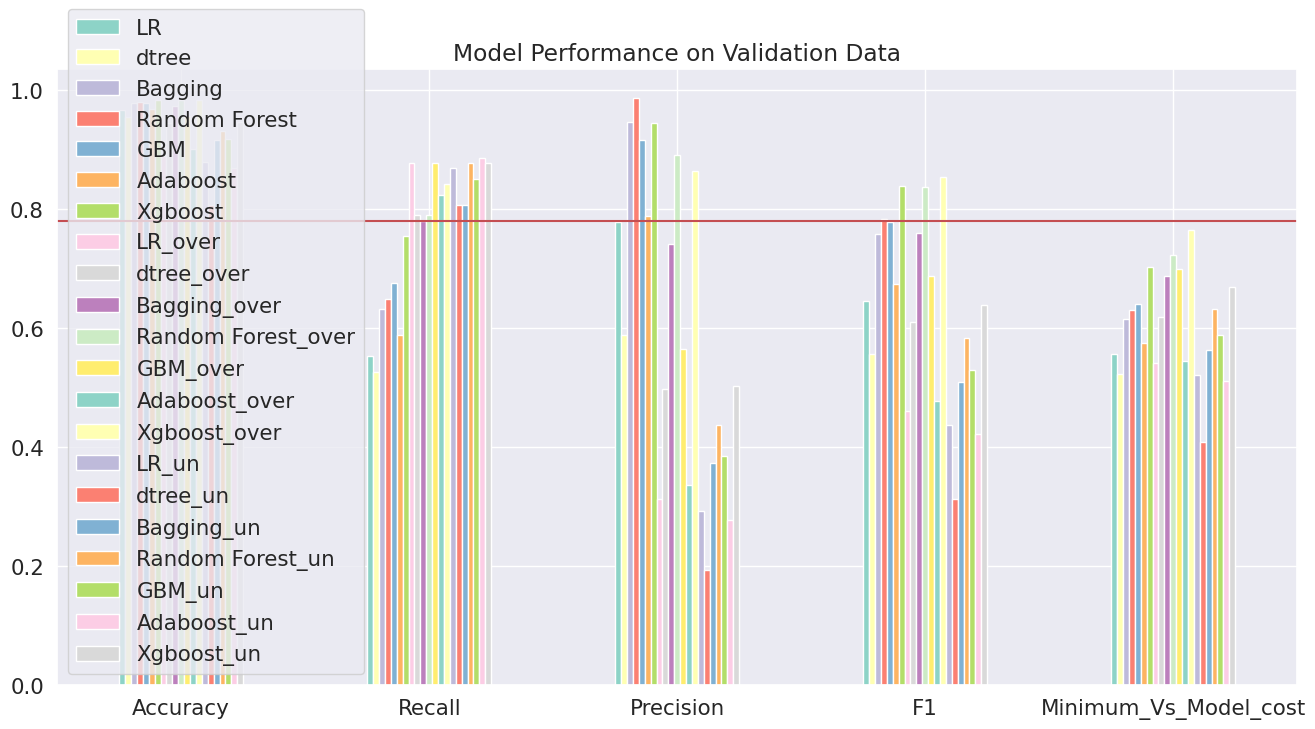

In [ ]:
#setting color
color=sns.set_palette("Set3");

#plotting
models_comp_df_val.plot(kind="bar", figsize=(16, 8));
plt.legend(models_comp_df_val.columns.tolist(), loc='lower left');
plt.xticks(rotation=0);
# adding a horizontal line
plt.axhline(y=0.78, color='r', linestyle='-', label="score threshold")

plt.title('Model Performance on Validation Data');

In [ ]:
models_comp_df_val.T[models_comp_df_val.T['Minimum_Vs_Model_cost']> 0.78]

Empty DataFrame
Columns: [Accuracy, Recall, Precision, F1, Minimum_Vs_Model_cost]
Index: []

### 8.3 Three Chosen Models
Chúng tôi Chọn **<font color='purple'>Random Forest_over</font>**, **<font color='purple'>Xgboost_over</font>**, và **<font color='purple'>dtree_over</font>** là ba mô hình hiệu suất tốt nhất trong số tất cả các mô hình đã xây dựng trước đó để điều chỉnh tiếp để cải thiện hiệu suất. Lý do cho sự lựa chọn này là:

* Random Forest_over, Xgboost_over có ''điểm trung bình cao nhất'' và ''độ lệch chuẩn thấp nhất'' của ''điểm CV''.
* Random Forest_over, Xgboost_over có ''giá trị Minimum_Vs_Model_cost cao nhất'' trên tập xác thực.
* dtree_over có một điểm CV trung bình rất cao (lớn hơn 0.9) và độ lệch chuẩn rất thấp.
* Mặc dù ''Minimum_Vs_Model_cost'' của dtree_over là 0.636047 trên tập xác thực không được đảm bảo lắm, chúng tôi nghĩ rằng điều chỉnh mô hình này có thể hữu ích vì nó là một mô hình đơn giản so với các mô hình khác và sẽ mất ít thời gian hơn cho GridSearchCV.

# <a name='link9'>  9. HyperparameterTuning  </a>

We aim to tune **<font color='purple'>Random Forest_over</font>**, **<font color='purple'>Xgboost_over</font>**, and **<font color='purple'>dtree_over</font>** classifying models.

In [ ]:
# Random Forest_over, Xgboost_over, and dtree_over classifiers
Random_Forest_over= RandomForestClassifier(random_state=1);
Xgboost_over= XGBClassifier(random_state=1, eval_metric="logloss");
dtree_over= DecisionTreeClassifier(random_state=1);

# fitting models on oversampled training set
Random_Forest_over.fit(X_train_over, y_train_over);
Xgboost_over.fit(X_train_over, y_train_over);
dtree_over.fit(X_train_over, y_train_over);

### 9.1 Important Features

- **Hyperparameter tuning can take a long time to run. To avoid that time complexity we first study the feature importance of the models to drop features that are not crucial for the predictions**.

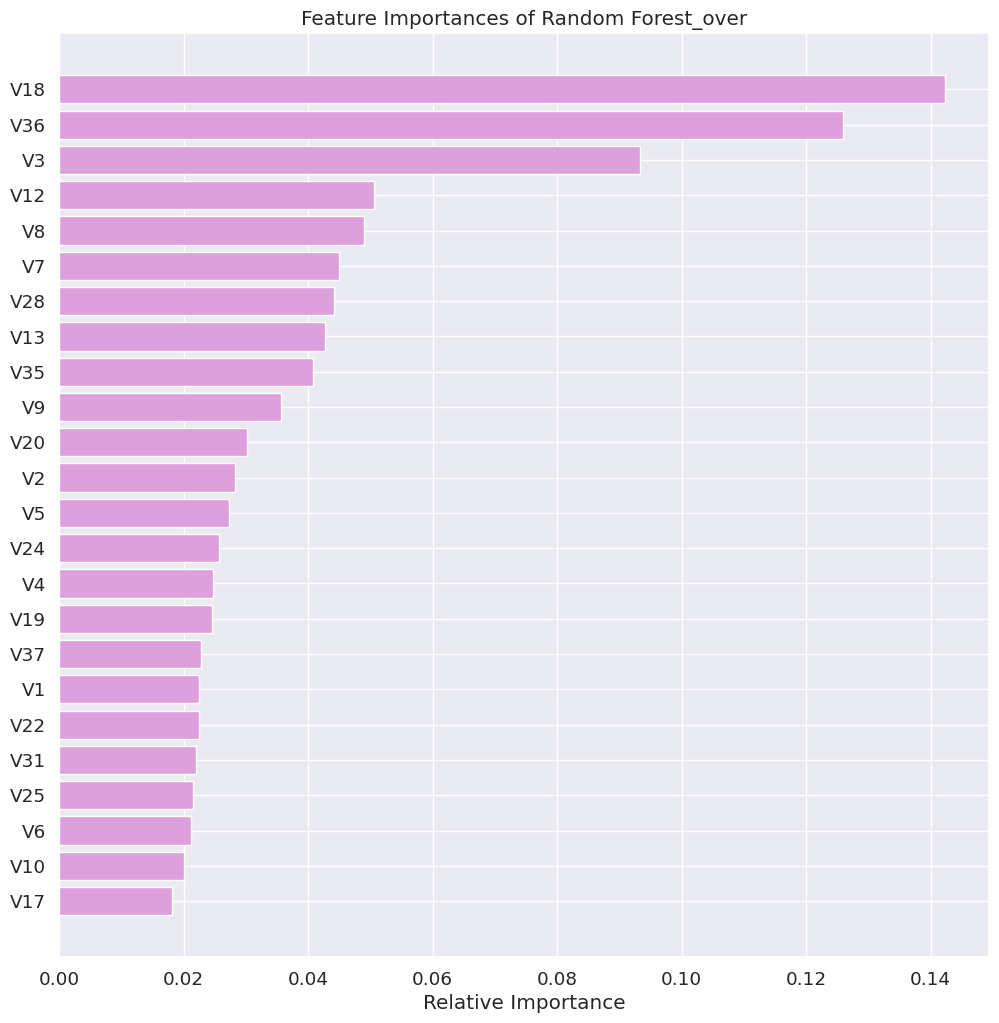

In [ ]:
# creating a list of column names
feature_names = X_train_over.columns.to_list()

CL=Random_Forest_over
CL_name= 'Random Forest_over'

# Displaying important features
importances = CL.feature_importances_
indices = np.argsort(importances)

#plotting
sns.set(font_scale = 1.2)
plt.figure(figsize=(12, 12))
plt.title("Feature Importances of {}".format(CL_name))
plt.barh(range(len(indices)), importances[indices], color="plum", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#important features
selected_features_rf= set(X_train_over.columns[indices.tolist()])

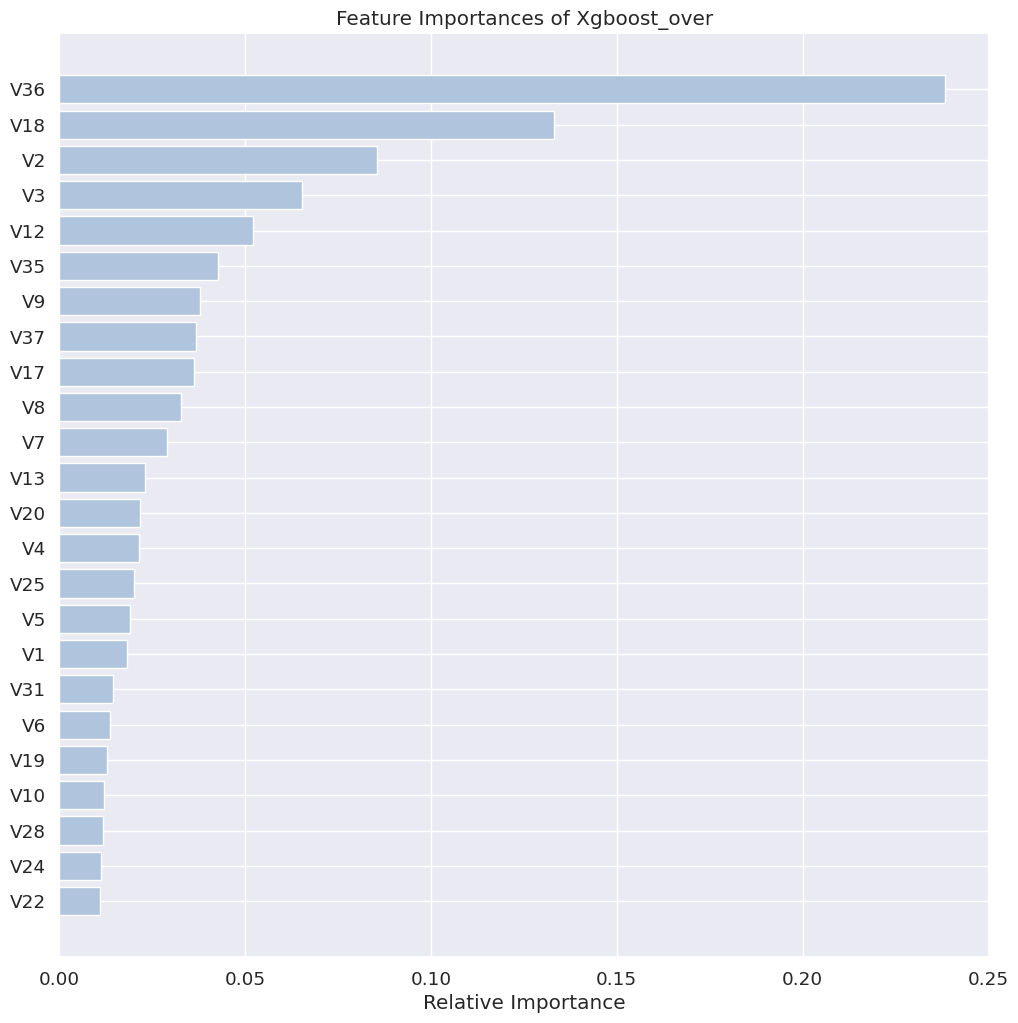

In [ ]:
# creating a list of column names
feature_names = X_train_over.columns.to_list()

CL=Xgboost_over
CL_name= 'Xgboost_over'

# Displaying important features
importances = CL.feature_importances_
indices = np.argsort(importances)

sns.set(font_scale = 1.2)
plt.figure(figsize=(12, 12))
plt.title("Feature Importances of {}".format(CL_name))
plt.barh(range(len(indices)), importances[indices], color="lightsteelblue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#important features
selected_features_Xgb= set(X_train_over.columns[indices.tolist()])

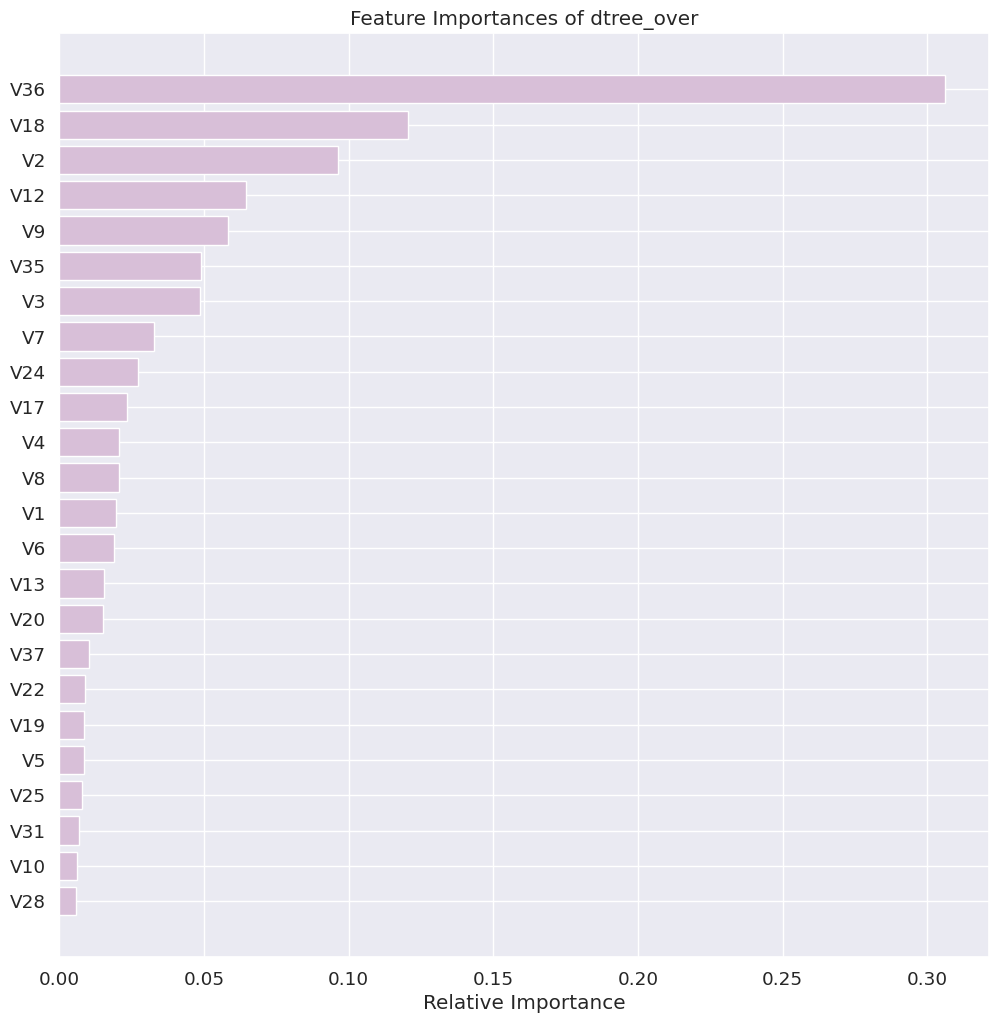

In [ ]:
# creating a list of column names
feature_names = X_train_over.columns.to_list()

CL=dtree_over
CL_name= 'dtree_over'

# Displaying important features
importances = CL.feature_importances_
indices = np.argsort(importances)

sns.set(font_scale = 1.2)
plt.figure(figsize=(12, 12))
plt.title("Feature Importances of {}".format(CL_name))
plt.barh(range(len(indices)), importances[indices], color="thistle", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#important features
selected_features_dtree= set(X_train_over.columns[indices.tolist()])

In [ ]:
# unifying important features of all models
selected_features_all= list(set.union(selected_features_rf, selected_features_Xgb, selected_features_dtree))

# removing unimportant features from data sets
X_train_final= X_train_over[selected_features_all]
X_val_final= X_val[selected_features_all]
X_test_final= X_test[selected_features_all]

y_train_final= y_train_over
y_val_final= y_val
y_test_final= y_test

### 9.2 Tuning Random Forest on OverSamlpled Data
### $\;\;\;\;$ `RandomizedSearchCV`

In [ ]:
%%time

# defining model
model = Random_Forest_over

# Parameter grid to pass in RandomizedSearchCV

param_grid = {
    "n_estimators": [150,250],
    "min_samples_leaf": np.arange(1, 3),
    "max_features": ['sqrt','log2'],
    "max_samples": np.arange(0.2, 0.6, 0.1)
}


# Type of scoring used to compare parameter combinations
scoring = scoring

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=20, scoring=scoring, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_final,y_train_final)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 250, 'min_samples_leaf': 1, 'max_samples': 0.5000000000000001, 'max_features': 'sqrt'} with CV score=0.9630904478168925:
CPU times: user 10.1 s, sys: 558 ms, total: 10.6 s
Wall time: 4min 40s


In [ ]:
# Set the model to the best combination of parameters
#Random_Forest_over_tuned = randomized_cv.best_estimator_
Random_Forest_over_tuned = RandomForestClassifier(
    random_state=1,
    n_estimators=250,
    min_samples_leaf= 1,
    max_samples= 0.5000000000000001,
    max_features= 'sqrt'
)

# Fit the model on training data
Random_Forest_over_tuned.fit(X_train_final, y_train_final);

In [ ]:
model= Random_Forest_over_tuned

# creating empty data frame With NaN values
df_metrics_tuned_rf = pd.DataFrame(columns = ['Accuracy', 'Recall', 'Precision', 'F1', 'Minimum_Vs_Model_cost'])

# adding rows to the empty data frame
df_metrics_tuned_rf.loc['train'] = model_performance_classification_sklearn(model.fit(X_train_final, y_train_final), X_train_final, y_train_final).loc[0]
df_metrics_tuned_rf.loc['val'] = model_performance_classification_sklearn(model.fit(X_train_final, y_train_final), X_val_final, y_val_final).loc[0]
print("\nperformance of tuned random forest on training and validation set:")
df_metrics_tuned_rf


performance of tuned random forest on training and validation set:


Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
train  0.998573  0.997315   0.999832  0.998572               0.995489
val    0.980000  0.798246   0.827273  0.812500               0.718487

### 9.3 Tuning Xgboost on OverSamlpled Data
### $\;\;\;\;$ `RandomizedSearchCV`

In [ ]:
%%time

# defining model
model = Xgboost_over

# Parameter grid to pass in GridSearchCV

param_grid={'n_estimators':np.arange(150,300,50),
            'scale_pos_weight':[5,10],
            'learning_rate':[0.1,0.2],
            'gamma':[0,3,5],
            'subsample':[0.8,0.9]}


# Type of scoring used to compare parameter combinations
scoring = scoring

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=20, scoring=scoring, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_final, y_train_final)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.8, 'scale_pos_weight': 10, 'n_estimators': 250, 'learning_rate': 0.1, 'gamma': 0} with CV score=0.9878493461487652:
CPU times: user 4.21 s, sys: 182 ms, total: 4.39 s
Wall time: 1min 19s


In [ ]:
# Set the model to the best combination of parameters
#Xgboost_over_tuned = randomized_cv.best_estimator_
Xgboost_over_tuned = XGBClassifier(
    random_state=1,
    n_estimators=200,
    scale_pos_weight=10,
    gamma=0,
    subsample=0.9,
    learning_rate=0.2,
    eval_metric="logloss"
)

# Fit the model on training data
Xgboost_over_tuned.fit(X_train_final, y_train_final);

In [ ]:
model= Xgboost_over_tuned

# creating empty data frame With NaN values
df_metrics_tuned_xgb = pd.DataFrame(columns = ['Accuracy', 'Recall', 'Precision', 'F1', 'Minimum_Vs_Model_cost'])

# adding rows to the empty data frame
df_metrics_tuned_xgb.loc['train'] = model_performance_classification_sklearn(model.fit(X_train_final, y_train_final), X_train_final, y_train_final).loc[0]
df_metrics_tuned_xgb.loc['val'] = model_performance_classification_sklearn(model.fit(X_train_final, y_train_final), X_val_final, y_val_final).loc[0]
print("\nperformance of tuned Xgboost on training and validation set:")
df_metrics_tuned_xgb


performance of tuned Xgboost on training and validation set:


Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
train  1.000000  1.000000   1.000000  1.000000                   1.00
val    0.979048  0.859649   0.777778  0.816667                   0.76

### 9.4 Tuning Decision Tree on OverSamlpled Data
### $\;\;\;\;$ `RandomizedSearchCV`

In [ ]:
%%time

# defining model
model = dtree_over

# Parameter grid to pass in GridSearchCV
param_grid = {'max_depth': [2, 5, 10, 15, 20, 30],
              'min_samples_leaf': [1, 2, 5, 7],
              'max_leaf_nodes' : [2, 5, 10,15, 20],
              'min_impurity_decrease': [0.1, 0.0001,0.001] }

# Type of scoring used to compare parameter combinations
scoring = scoring

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=40, scoring=scoring, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_final, y_train_final)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 20, 'max_depth': 10} with CV score=0.834345918061658:
CPU times: user 852 ms, sys: 52.6 ms, total: 904 ms
Wall time: 21 s


In [ ]:
# Set the model to the best combination of parameters
#dtree_over_tuned = randomized_cv.best_estimator_
dtree_over_tuned = DecisionTreeClassifier(
    min_samples_leaf=7,
    min_impurity_decrease=0.0001,
    max_leaf_nodes=20,
    max_depth=10
)

# Fit the model on training data
dtree_over_tuned.fit(X_train_final, y_train_final);

In [ ]:
model= dtree_over_tuned

# creating empty data frame With NaN values
df_metrics_tuned_dtree = pd.DataFrame(columns = ['Accuracy', 'Recall', 'Precision', 'F1', 'Minimum_Vs_Model_cost'])

# adding rows to the empty data frame
df_metrics_tuned_dtree.loc['train'] = model_performance_classification_sklearn(model.fit(X_train_final, y_train_final), X_train_final, y_train_final).loc[0]
df_metrics_tuned_dtree.loc['val'] = model_performance_classification_sklearn(model.fit(X_train_final, y_train_final), X_val_final, y_val_final).loc[0]
print("\nperformance of tuned decision tree on training and validation set:")
df_metrics_tuned_dtree


performance of tuned decision tree on training and validation set:


Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
train  0.916499  0.919604   0.913928  0.916757               0.859947
val    0.893333  0.842105   0.317881  0.461538               0.536050

### 9.5 Comparison of Tuned Models

##### Model Performance on Training Data

In [ ]:
# creating empty data frame With NaN values
df_all_train_tuned = pd.DataFrame(columns = ['Accuracy', 'Recall', 'Precision', 'F1', 'Minimum_Vs_Model_cost'])

# adding rows to the empty data frame
df_all_train_tuned.loc['Random_Forest_over_tuned'] = df_metrics_tuned_rf.loc['train']
df_all_train_tuned.loc['Xgboost_over_tuned'] = df_metrics_tuned_xgb.loc['train']
df_all_train_tuned.loc['dtree_over_tuned'] = df_metrics_tuned_dtree.loc['train']
print("\nperformance of tuned models on training set:")
df_all_train_tuned


performance of tuned models on training set:


Accuracy    Recall  Precision        F1  \
Random_Forest_over_tuned  0.998573  0.997315   0.999832  0.998572   
Xgboost_over_tuned        1.000000  1.000000   1.000000  1.000000   
dtree_over_tuned          0.916499  0.919604   0.913928  0.916757   

                          Minimum_Vs_Model_cost  
Random_Forest_over_tuned               0.995489  
Xgboost_over_tuned                     1.000000  
dtree_over_tuned                       0.859947

##### Model Performance on Validation Data

In [ ]:
# creating empty data frame With NaN values
df_all_val_tuned = pd.DataFrame(columns = ['Accuracy', 'Recall', 'Precision', 'F1', 'Minimum_Vs_Model_cost'])

# adding rows to the empty data frame
df_all_val_tuned.loc['Random_Forest_over_tuned'] = df_metrics_tuned_rf.loc['val']
df_all_val_tuned.loc['Xgboost_over_tuned'] = df_metrics_tuned_xgb.loc['val']
df_all_val_tuned.loc['dtree_over_tuned'] = df_metrics_tuned_dtree.loc['val']
print("\nperformance of tuned models on validation set:")
df_all_val_tuned


performance of tuned models on validation set:


Accuracy    Recall  Precision        F1  \
Random_Forest_over_tuned  0.980000  0.798246   0.827273  0.812500   
Xgboost_over_tuned        0.979048  0.859649   0.777778  0.816667   
dtree_over_tuned          0.893333  0.842105   0.317881  0.461538   

                          Minimum_Vs_Model_cost  
Random_Forest_over_tuned               0.718487  
Xgboost_over_tuned                     0.760000  
dtree_over_tuned                       0.536050

# <a name='link10'>  10. Comparing all Models  </a>

### 10.1 Summary of Performances on Training Data

In [ ]:
# training performance comparison
df_all_train = pd.concat( [ models_comp_df_train.T, df_all_train_tuned], axis=0)
print("\nperformance of all models on training set:")
df_all_train


performance of all models on training set:


Accuracy    Recall  Precision        F1  \
LR                        0.972849  0.561765   0.896714  0.690778   
dtree                     1.000000  1.000000   1.000000  1.000000   
Bagging                   0.996983  0.944118   1.000000  0.971256   
Random Forest             0.999841  0.997059   1.000000  0.998527   
GBM                       0.993172  0.882353   0.990099  0.933126   
Adaboost                  0.978247  0.670588   0.901186  0.768971   
Xgboost                   1.000000  1.000000   1.000000  1.000000   
LR_over                   0.896694  0.894763   0.898231  0.896494   
dtree_over                1.000000  1.000000   1.000000  1.000000   
Bagging_over              0.999329  0.998993   0.999664  0.999328   
Random Forest_over        1.000000  1.000000   1.000000  1.000000   
GBM_over                  0.965844  0.953508   0.977629  0.965418   
Adaboost_over             0.926066  0.927492   0.924854  0.926171   
Xgboost_over              1.000000  1.000000   1.000000  1.000000   
LR_un                     0.873529  0.870588   0.875740  0.873156   
dtree_un                  1.000000  1.000000   1.000000  1.000000   
Bagging_un                0.991176  0.988235   0.994083  0.991150   
Random Forest_un          1.000000  1.000000   1.000000  1.000000   
GBM_un                    0.989706  0.979412   1.000000  0.989599   
Adaboost_un               0.944118  0.932353   0.954819  0.943452   
Xgboost_un                1.000000  1.000000   1.000000  1.000000   
Random_Forest_over_tuned  0.998573  0.997315   0.999832  0.998572   
Xgboost_over_tuned        1.000000  1.000000   1.000000  1.000000   
dtree_over_tuned          0.916499  0.919604   0.913928  0.916757   

                          Minimum_Vs_Model_cost  
LR                                     0.570789  
dtree                                  1.000000  
Bagging                                0.914798  
Random Forest                          0.995122  
GBM                                    0.834015  
Adaboost                               0.635514  
Xgboost                                1.000000  
LR_over                                0.827002  
dtree_over                             1.000000  
Bagging_over                           0.998213  
Random Forest_over                     1.000000  
GBM_over                               0.921863  
Adaboost_over                          0.872626  
Xgboost_over                           1.000000  
LR_un                                  0.795632  
dtree_un                               1.000000  
Bagging_un                             0.978887  
Random Forest_un                       1.000000  
GBM_un                                 0.966825  
Adaboost_un                            0.886957  
Xgboost_un                             1.000000  
Random_Forest_over_tuned               0.995489  
Xgboost_over_tuned                     1.000000  
dtree_over_tuned                       0.859947

### 10.2 Summary of Performances on Validation Data

In [ ]:
# validation performance comparison
df_all_val = pd.concat( [ models_comp_df_val.T, df_all_val_tuned], axis=0)
print("\nperformance of all models on validation set:")
df_all_val


performance of all models on validation set:


Accuracy    Recall  Precision        F1  \
LR                        0.967143  0.552632   0.777778  0.646154   
dtree                     0.954286  0.526316   0.588235  0.555556   
Bagging                   0.978095  0.631579   0.947368  0.757895   
Random Forest             0.980476  0.649123   0.986667  0.783069   
GBM                       0.979048  0.675439   0.916667  0.777778   
Adaboost                  0.969048  0.587719   0.788235  0.673367   
Xgboost                   0.984286  0.754386   0.945055  0.839024   
LR_over                   0.888571  0.877193   0.312500  0.460829   
dtree_over                0.945238  0.789474   0.497238  0.610169   
Bagging_over              0.973333  0.780702   0.741667  0.760684   
Random Forest_over        0.983333  0.789474   0.891089  0.837209   
GBM_over                  0.956667  0.877193   0.564972  0.687285   
Adaboost_over             0.901905  0.824561   0.335714  0.477157   
Xgboost_over              0.984286  0.842105   0.864865  0.853333   
LR_un                     0.878571  0.868421   0.292035  0.437086   
dtree_un                  0.806667  0.807018   0.193277  0.311864   
Bagging_un                0.915714  0.807018   0.372470  0.509695   
Random Forest_un          0.931905  0.877193   0.436681  0.583090   
GBM_un                    0.918095  0.850877   0.384921  0.530055   
Adaboost_un               0.868571  0.885965   0.277473  0.422594   
Xgboost_un                0.946190  0.877193   0.502513  0.638978   
Random_Forest_over_tuned  0.980000  0.798246   0.827273  0.812500   
Xgboost_over_tuned        0.979048  0.859649   0.777778  0.816667   
dtree_over_tuned          0.893333  0.842105   0.317881  0.461538   

                          Minimum_Vs_Model_cost  
LR                                     0.556098  
dtree                                  0.522936  
Bagging                                0.615108  
Random Forest                          0.629834  
GBM                                    0.640449  
Adaboost                               0.574790  
Xgboost                                0.702259  
LR_over                                0.541139  
dtree_over                             0.618445  
Bagging_over                           0.686747  
Random Forest_over                     0.723044  
GBM_over                               0.699387  
Adaboost_over                          0.544586  
Xgboost_over                           0.765101  
LR_un                                  0.520548  
dtree_un                               0.409091  
Bagging_un                             0.563427  
Random Forest_un                       0.632163  
GBM_un                                 0.587629  
Adaboost_un                            0.510448  
Xgboost_un                             0.669276  
Random_Forest_over_tuned               0.718487  
Xgboost_over_tuned                     0.760000  
dtree_over_tuned                       0.536050

### 10.3 Models with Highest "Minimum_Vs_Model_cost"

Among all models, `Minimum_Vs_Model_cost` of the following models is greater than 0.78 on the validation set.

In [ ]:
best_model_list= df_all_val[df_all_val['Minimum_Vs_Model_cost']>0.78].T.columns
print("\nperformance of models with 'Minimum_Vs_Model_cost' greater than 0.78 on validation set:")
df_all_val[df_all_val['Minimum_Vs_Model_cost']>0.78]


performance of models with 'Minimum_Vs_Model_cost' greater than 0.78 on validation set:


Empty DataFrame
Columns: [Accuracy, Recall, Precision, F1, Minimum_Vs_Model_cost]
Index: []

Let us take a look at the training performance of these models.

In [ ]:
print("\nperformance of the selected models on training set:")
df_all_train.T[best_model_list].T


performance of the selected models on training set:


Empty DataFrame
Columns: [Accuracy, Recall, Precision, F1, Minimum_Vs_Model_cost]
Index: []